In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

from IPython.display import Image
#!pip install -U kaleido
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import impute
from sklearn import compose
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
!pip install sweetviz
import sweetviz as sw
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.1 MB/s eta 0:00:00


# Name: Shaked Shoshan
 **ID: 208140111**
# Kaggle user: https://www.kaggle.com/shakedshoshan

# **TL;DR**
Linear regression is used by real estate experts, economists, and data scientists to forecast property values. The linear regression method simulates the relationship between a dependent variable, such as a property price, and one or more independent factors. We can estimate the worth of a house based on its attributes and historical sales data using linear regression. It can be used to forecast future property values or to assess the accuracy of existing pricing models. However, linear regression is not a perfect predictor of house values because there are numerous elements that can influence the value of a property that the model may not capture.

 **Fetch train data**

In [2]:
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

# **Essential Data Analysis**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

                                             |          | [  0%]   00:00 -> (? left)


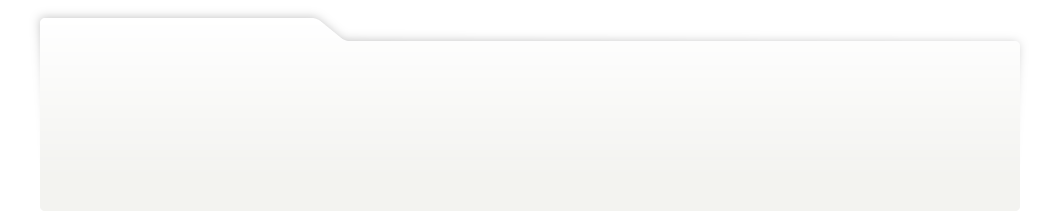
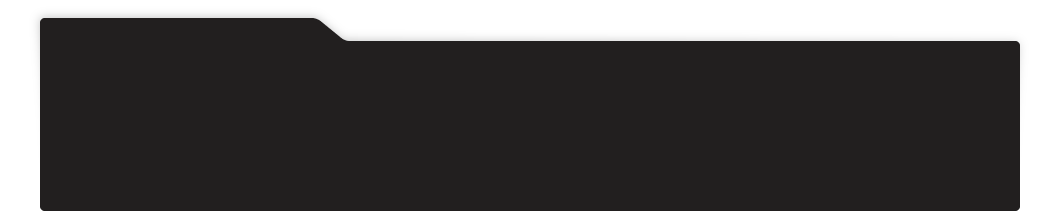
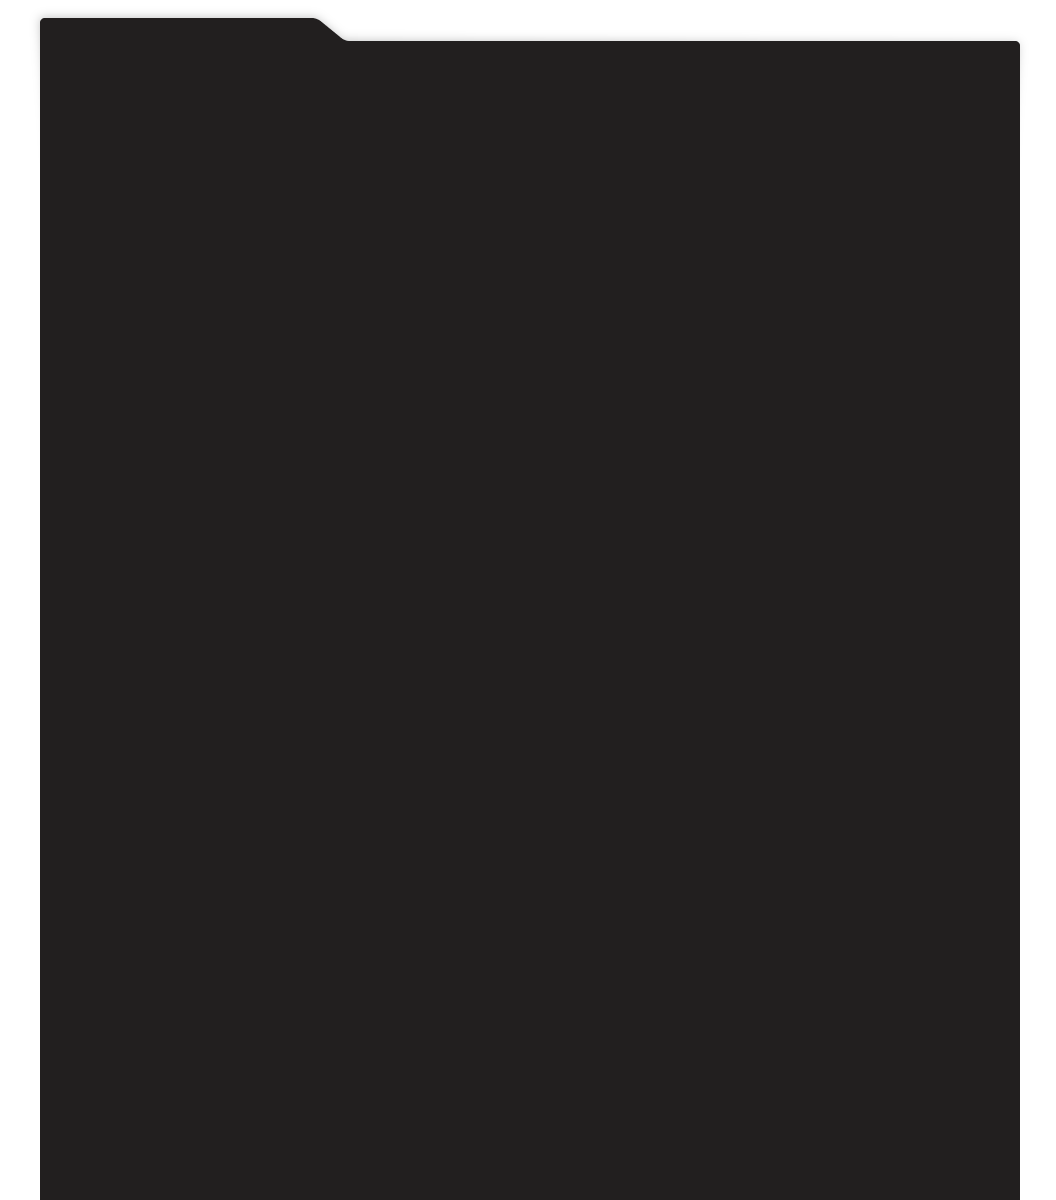
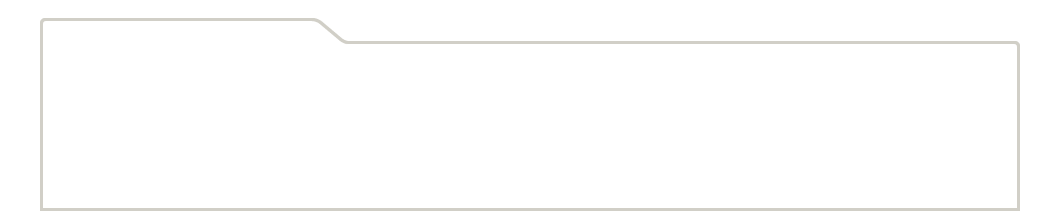
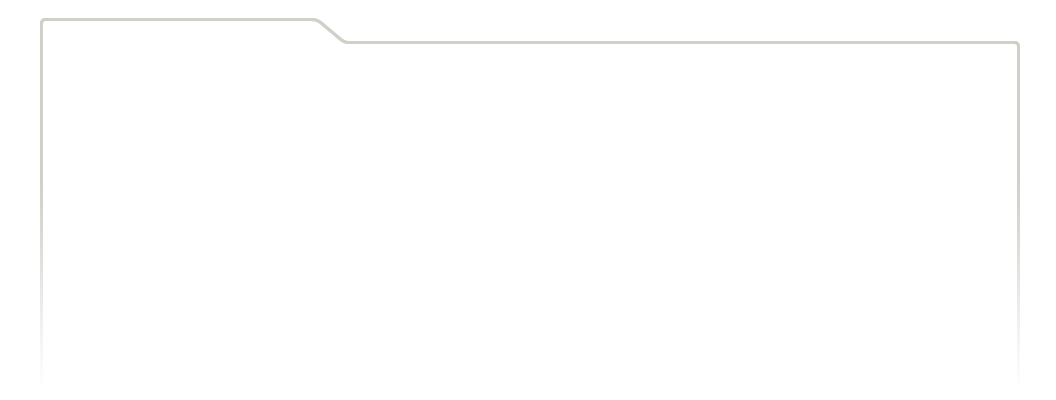
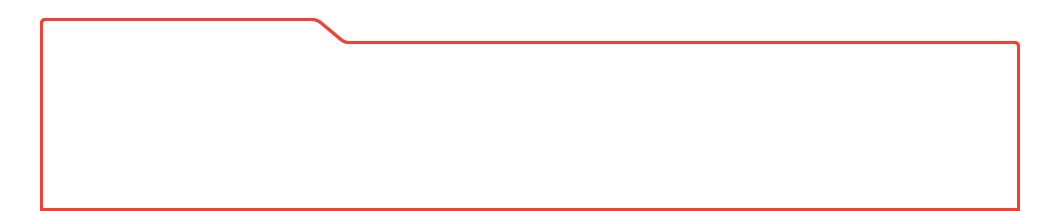
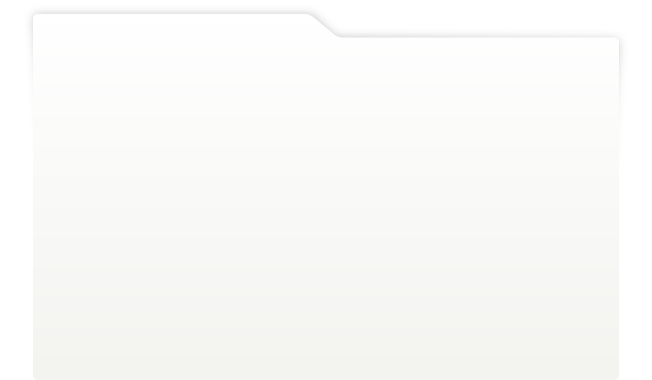
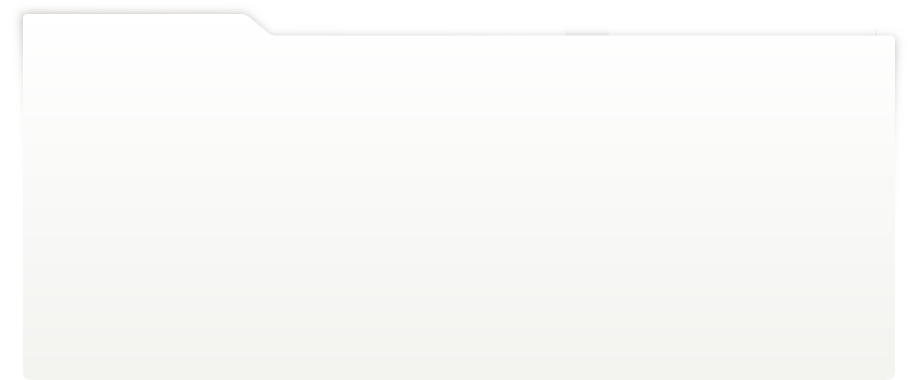
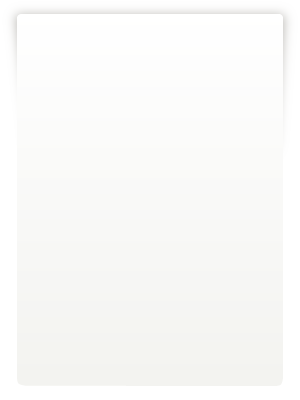
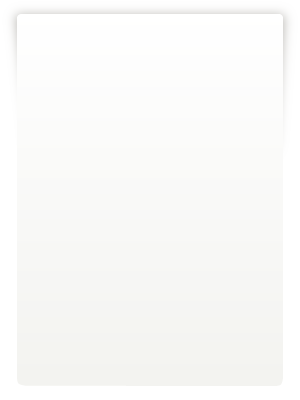
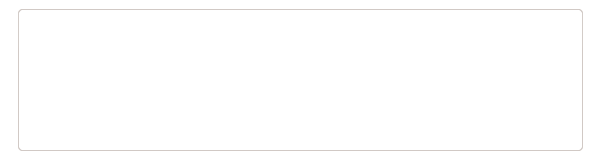
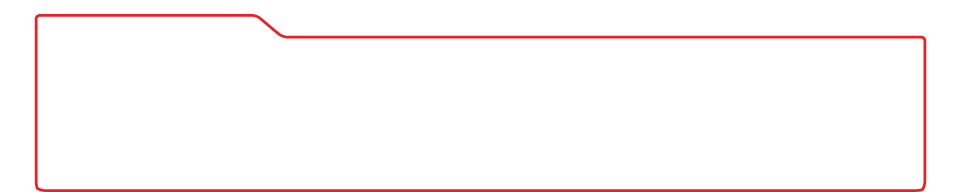
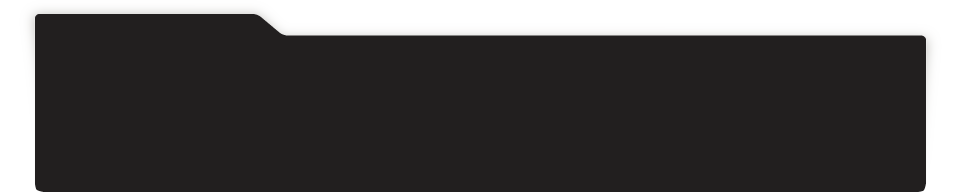
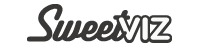
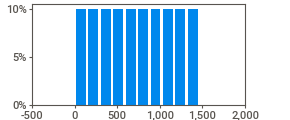
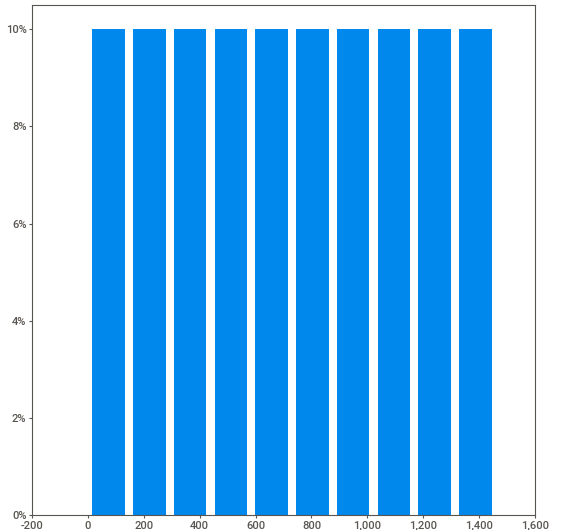
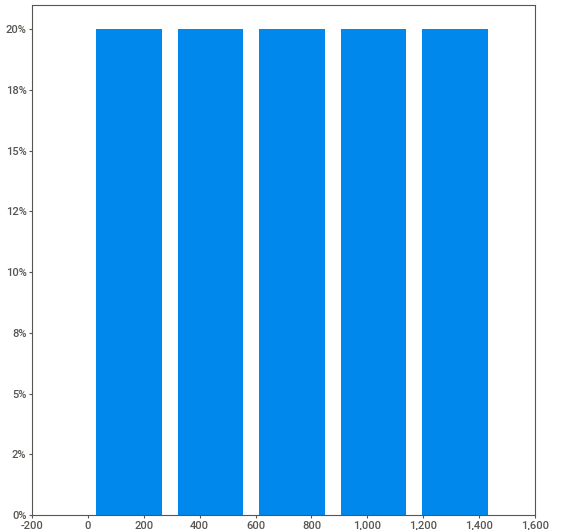
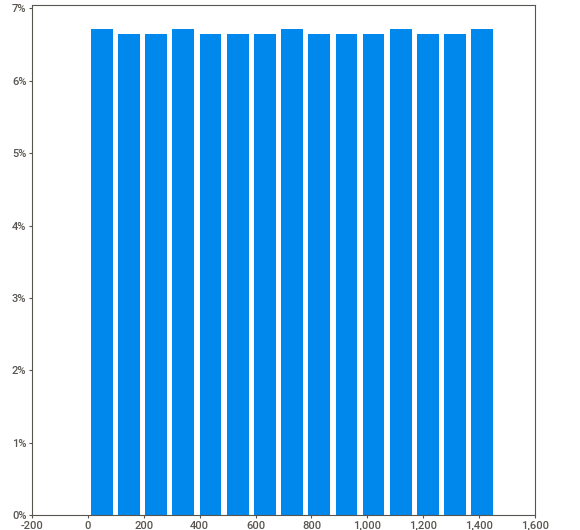
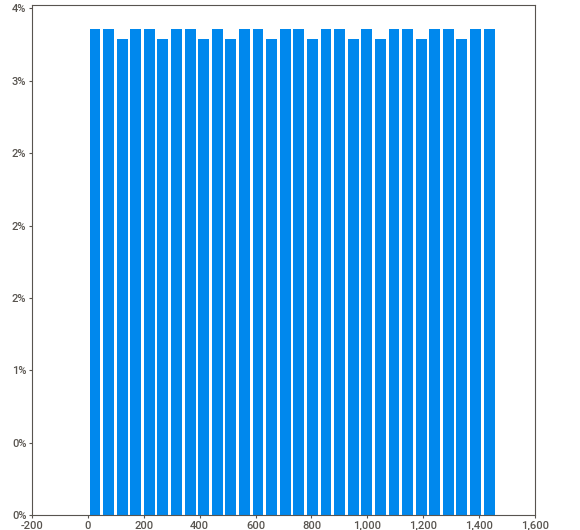
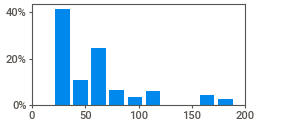
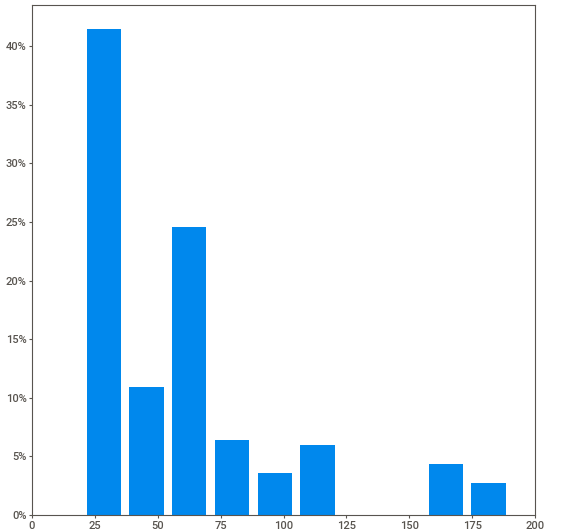
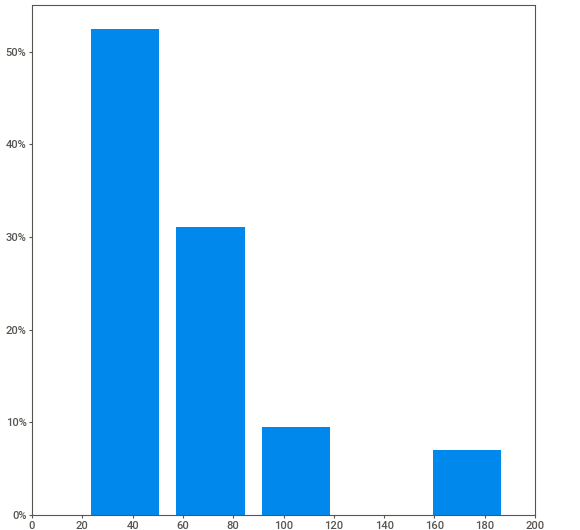
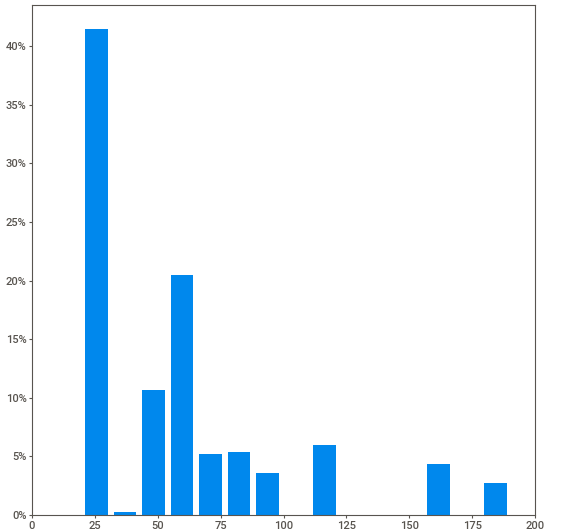
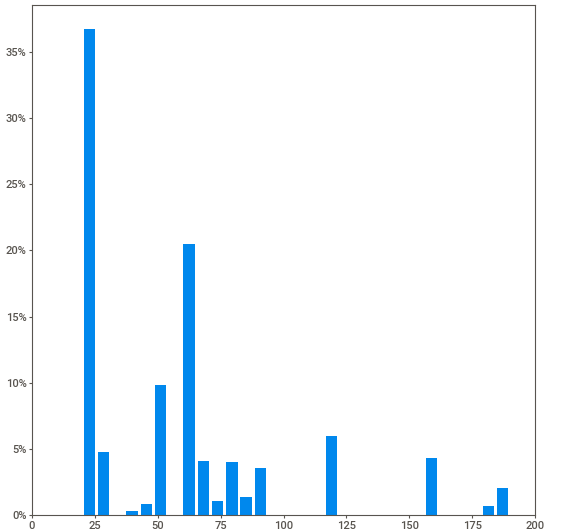
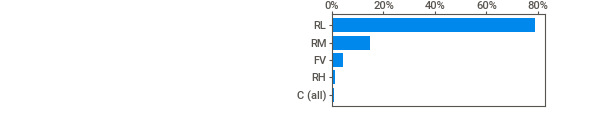
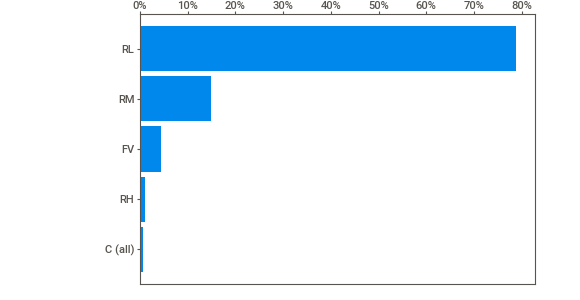
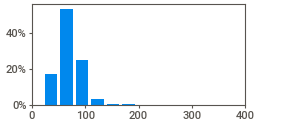
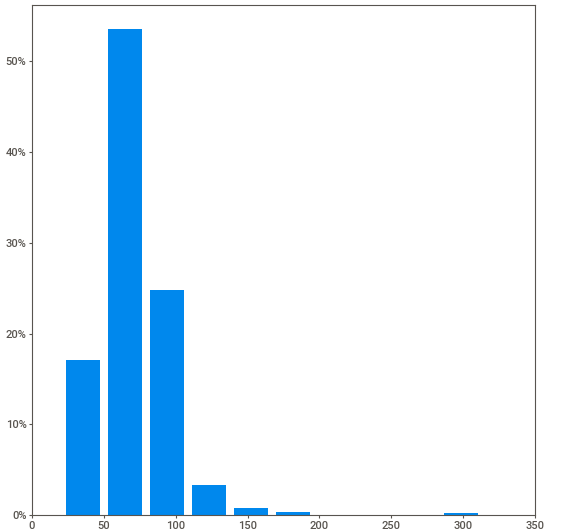
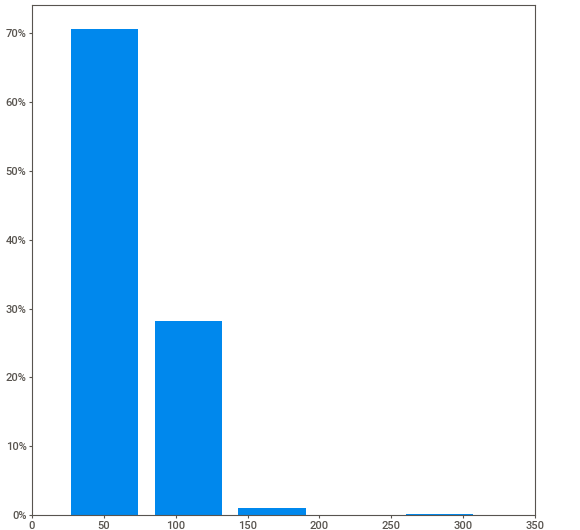
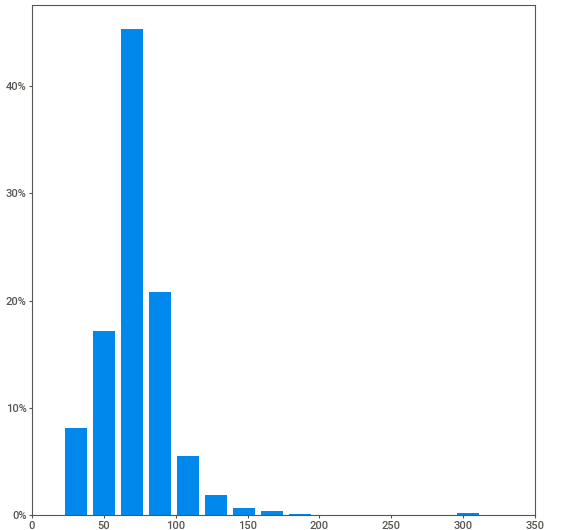
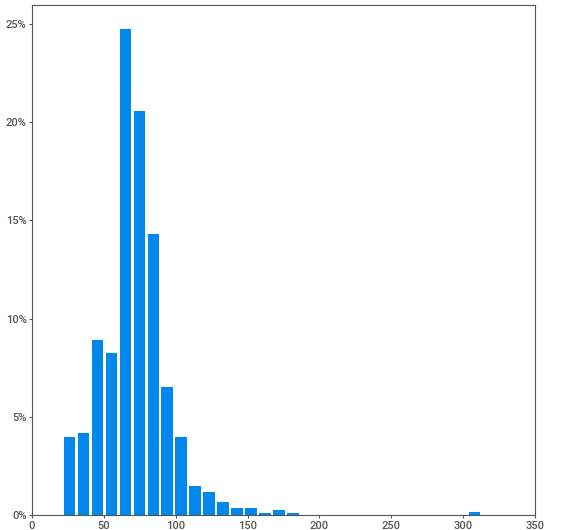
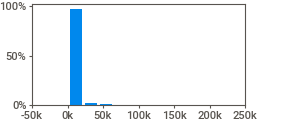
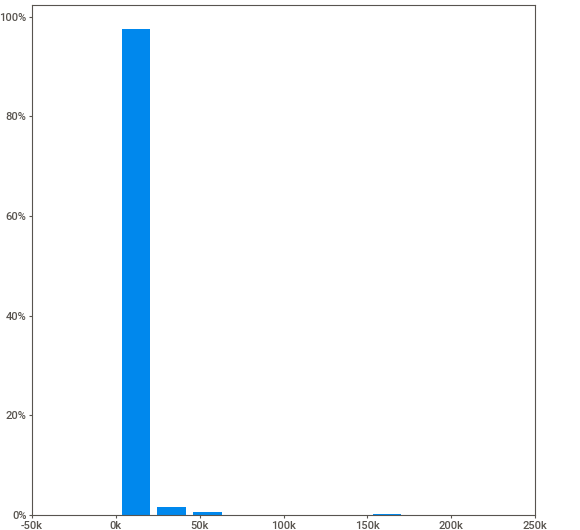
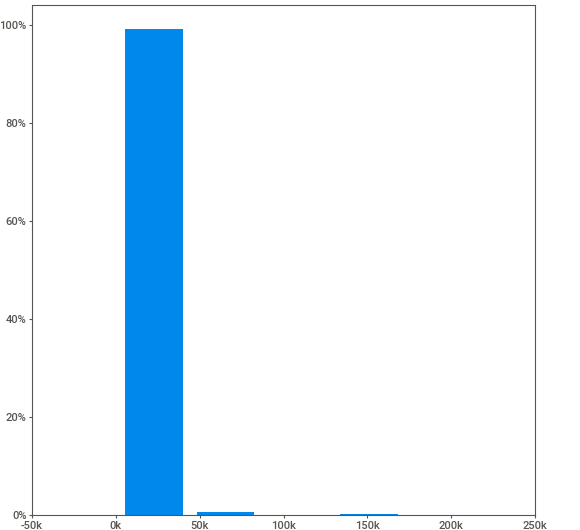
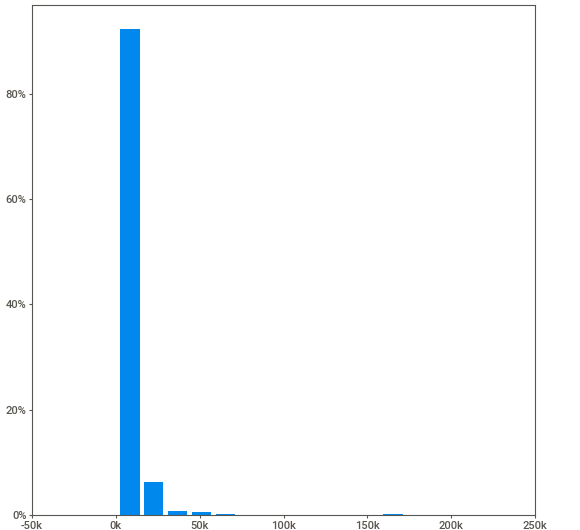
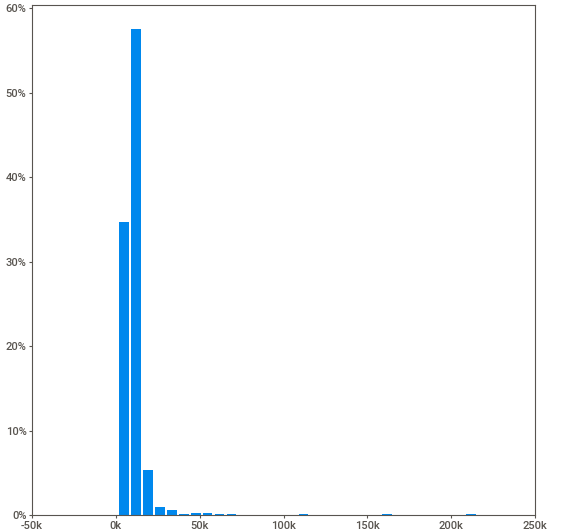
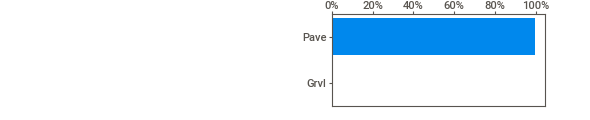
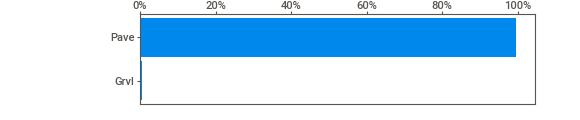
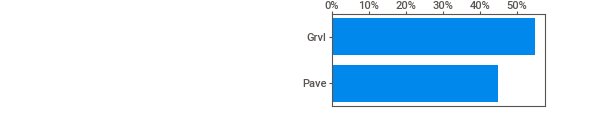
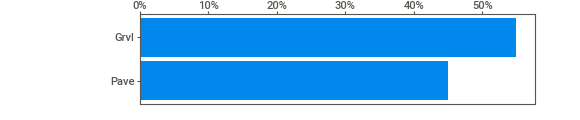
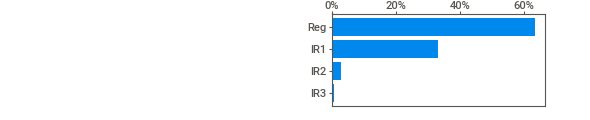
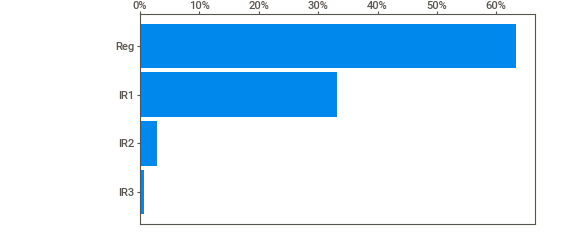
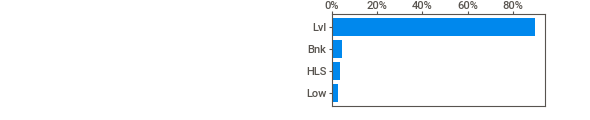
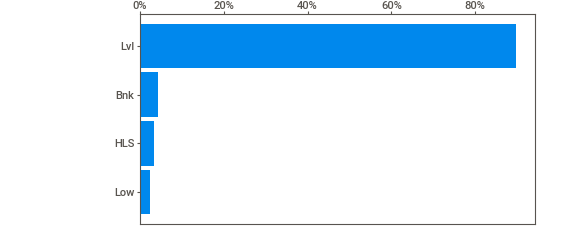
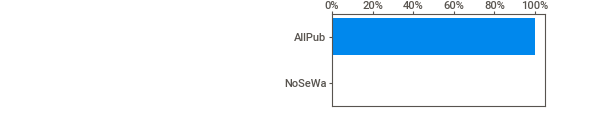
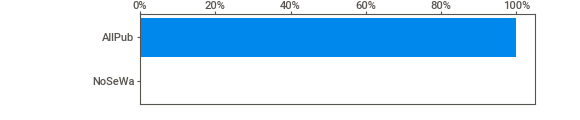
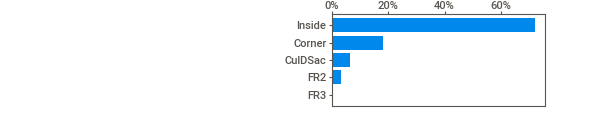
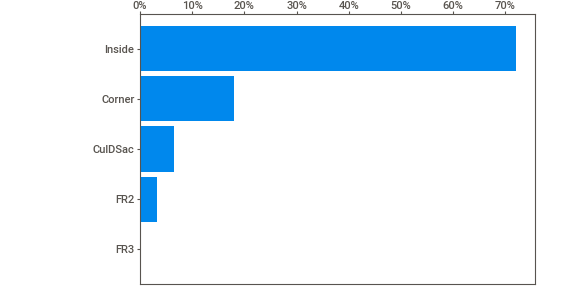
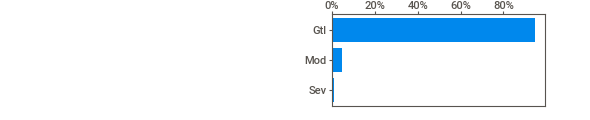
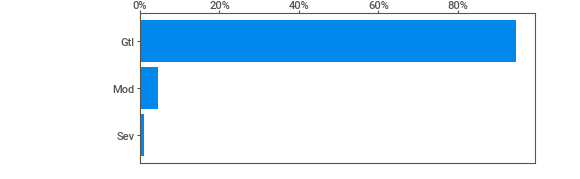
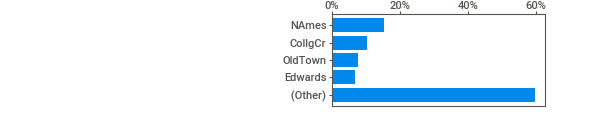
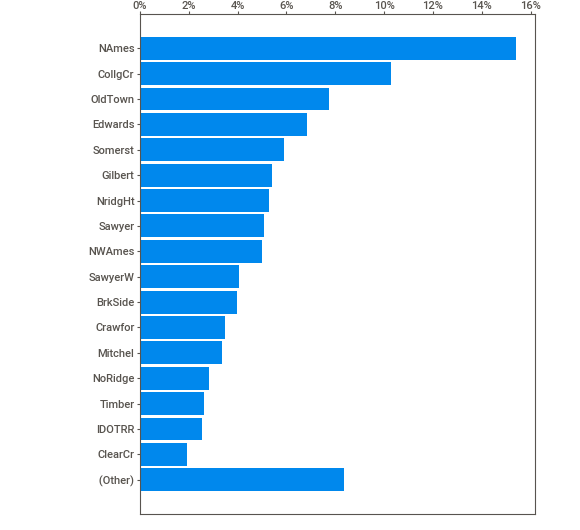
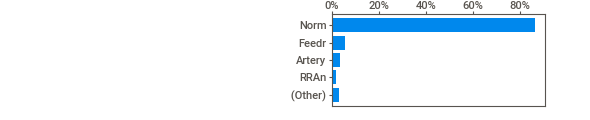
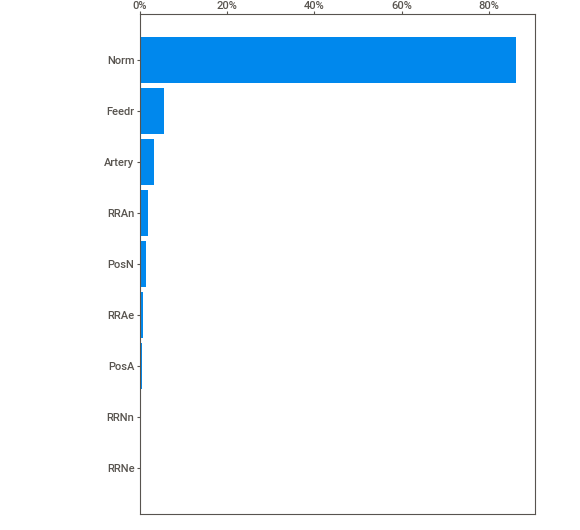
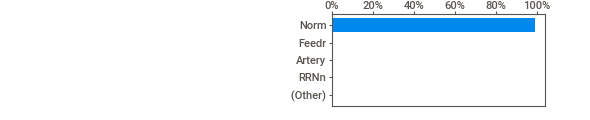
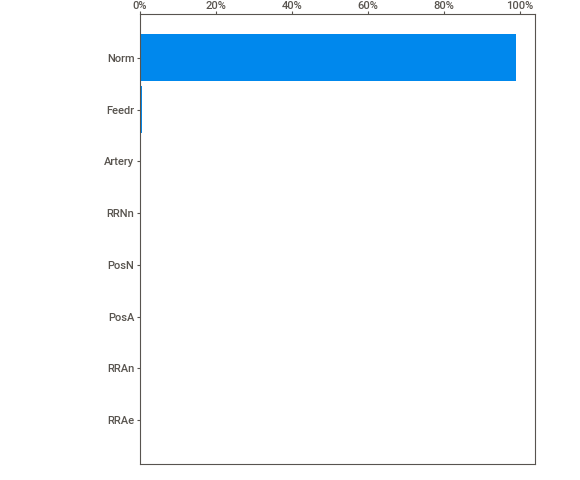
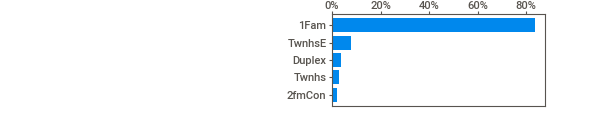
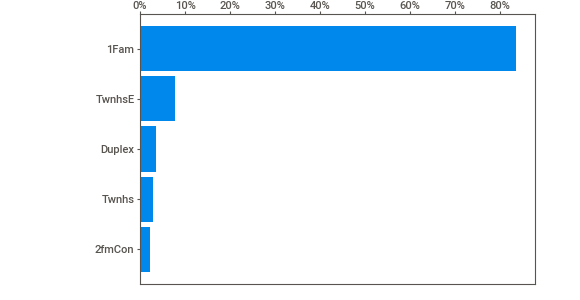
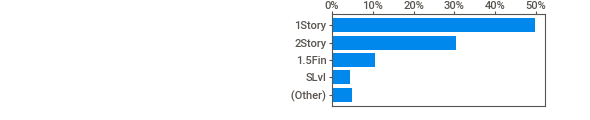
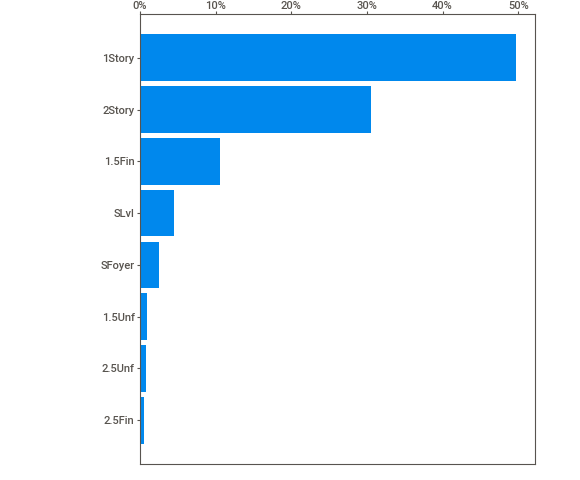
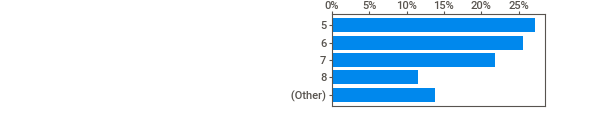
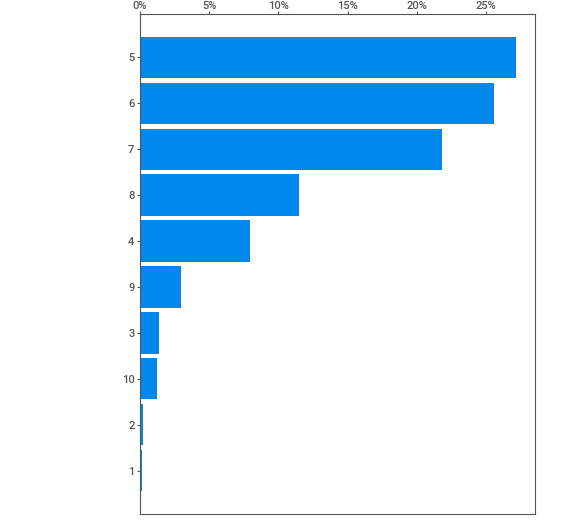
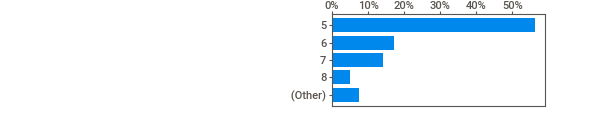
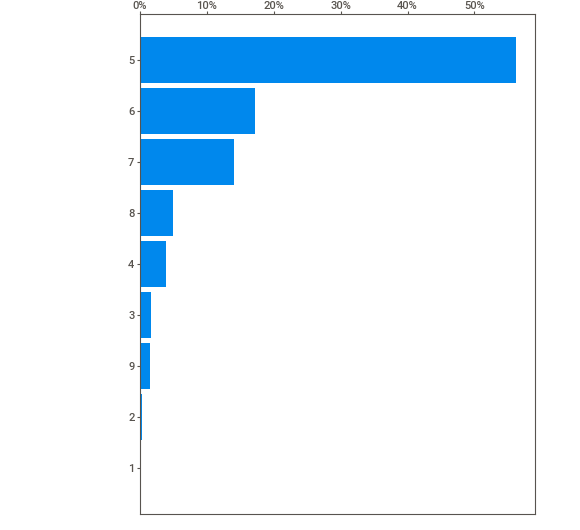
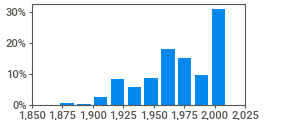
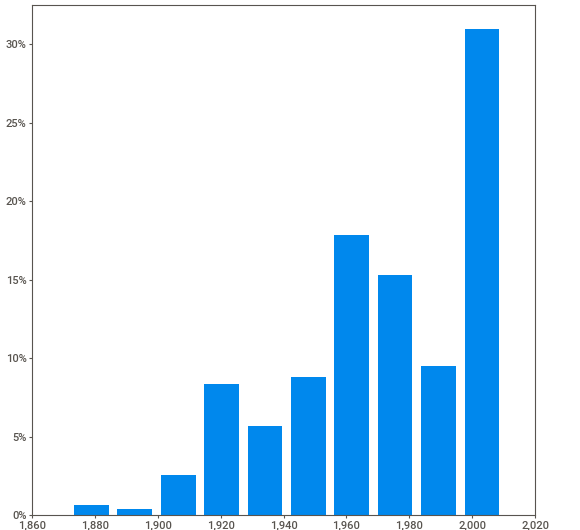
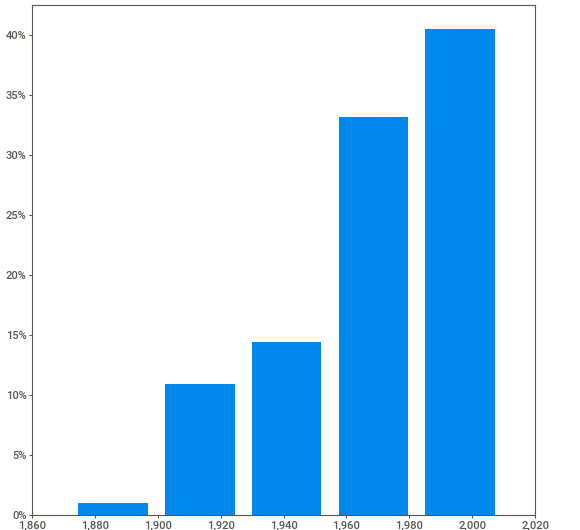
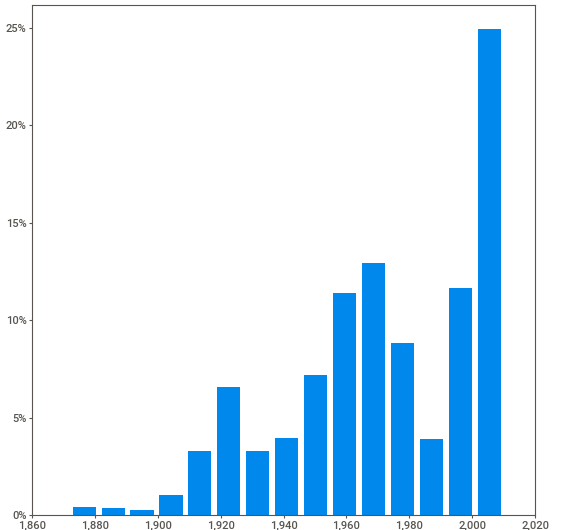
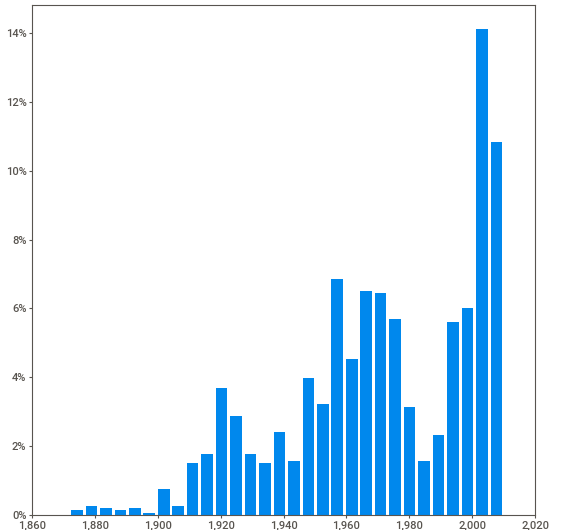
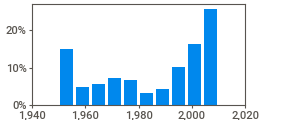
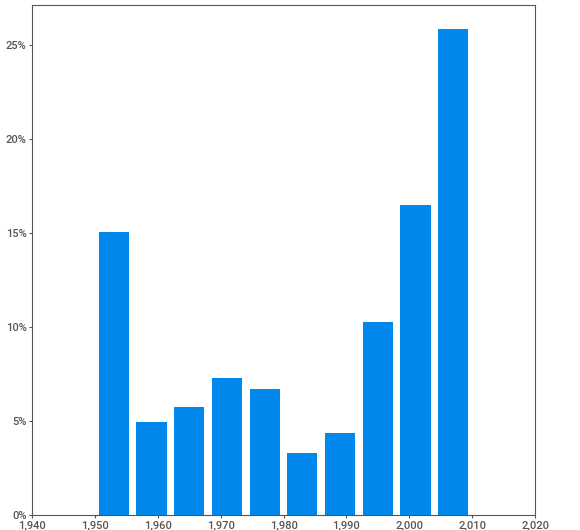
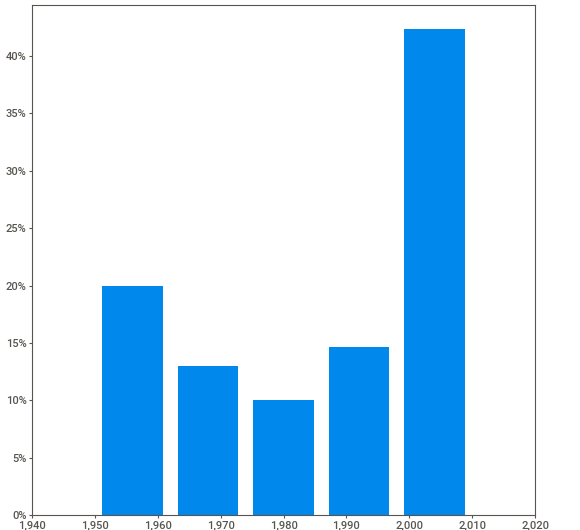
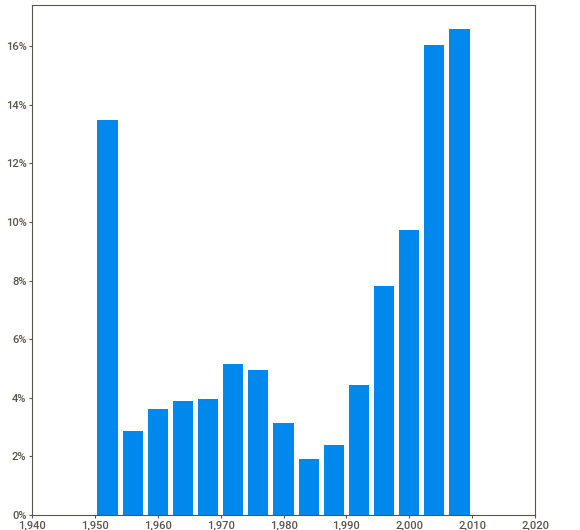
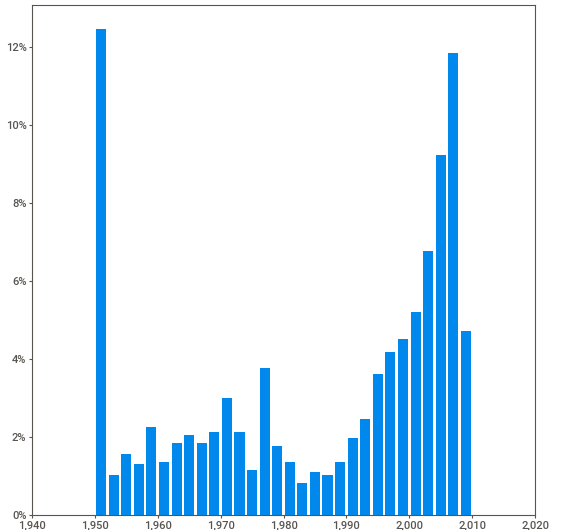
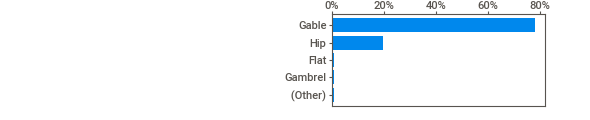
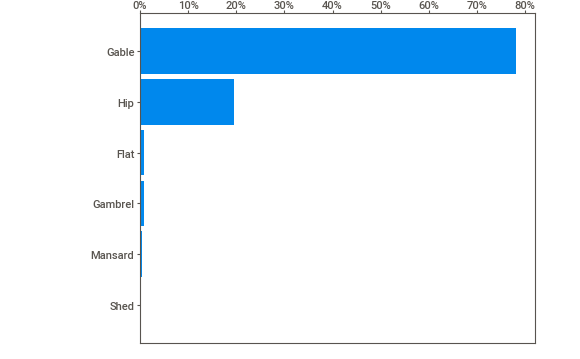
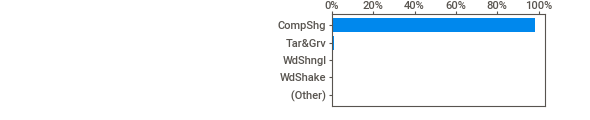
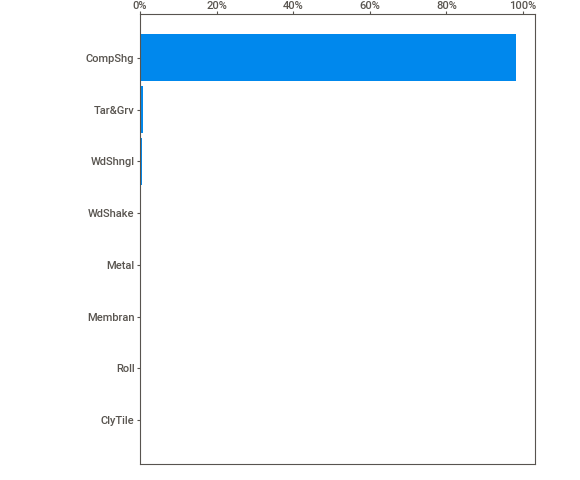
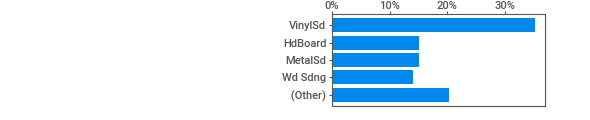
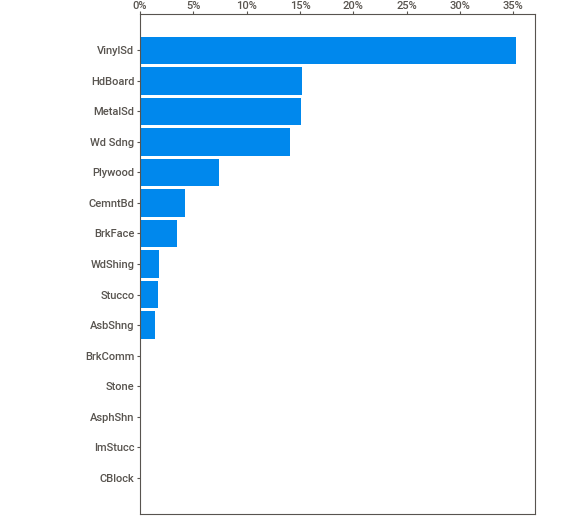
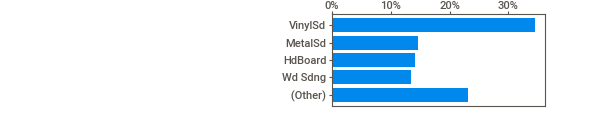
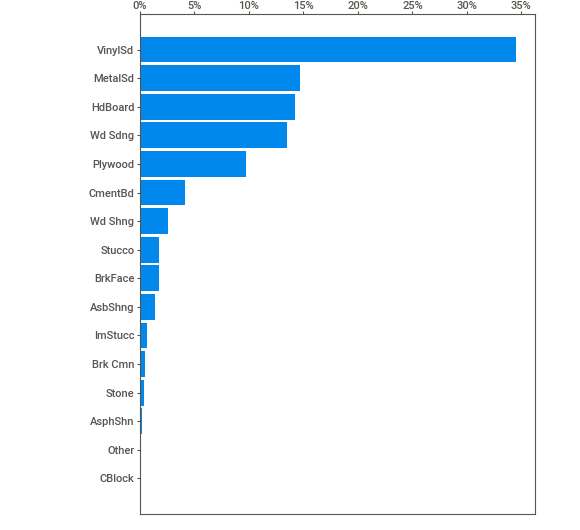
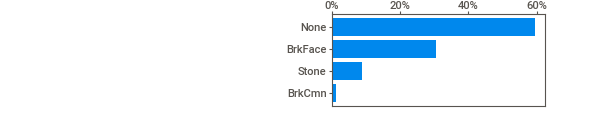
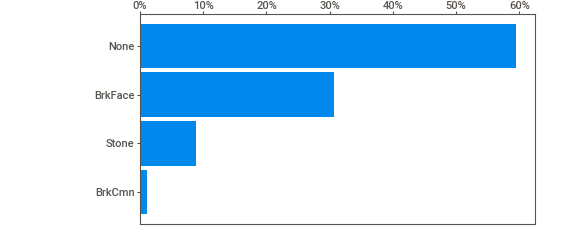
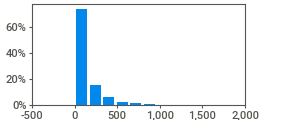
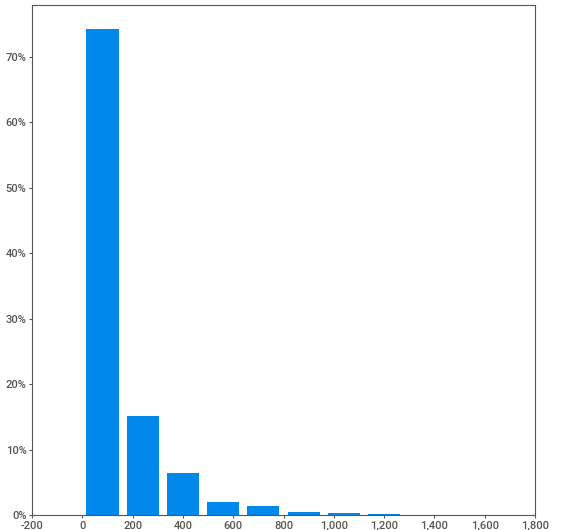
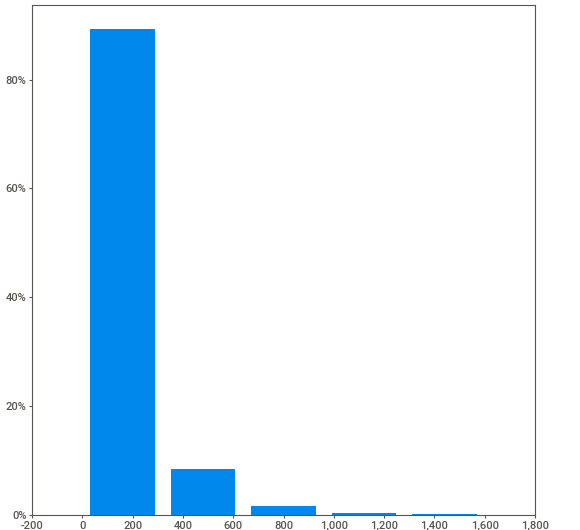
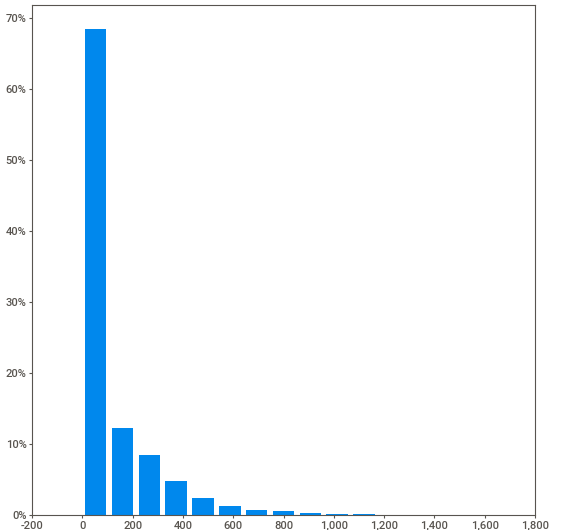
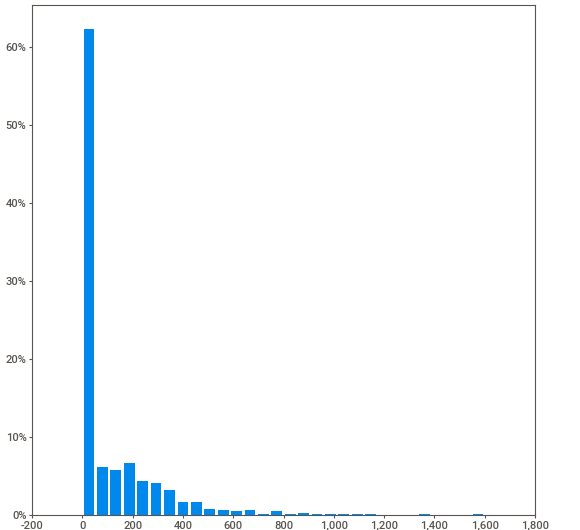
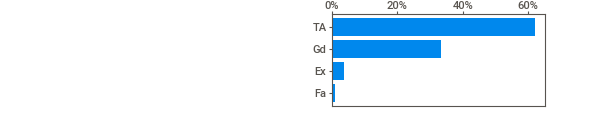
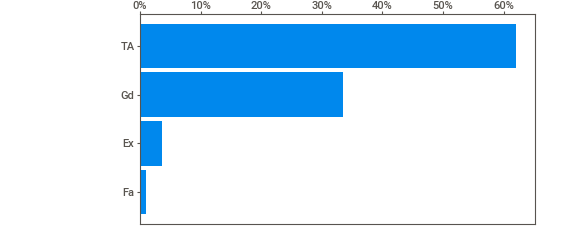
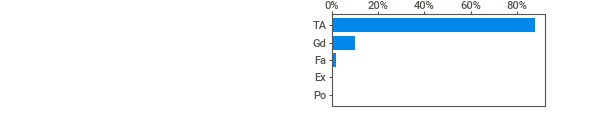
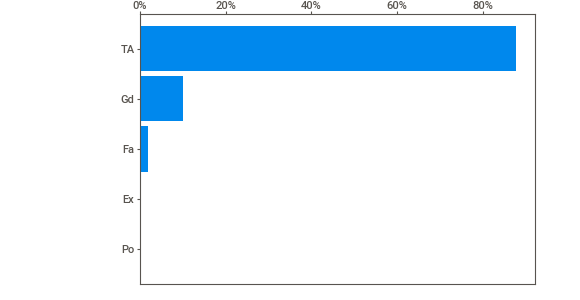
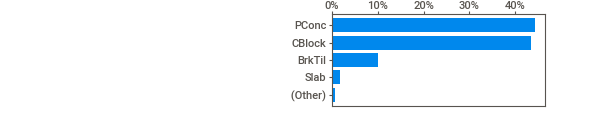
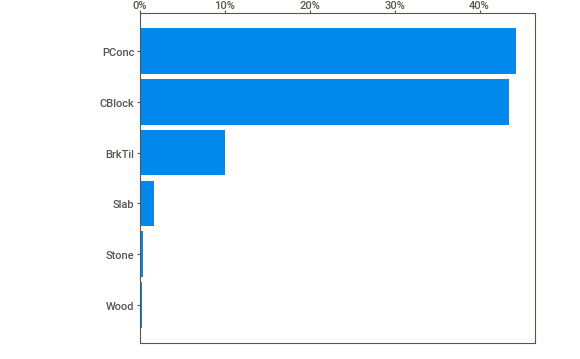
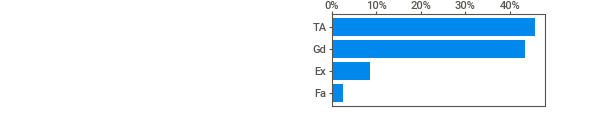
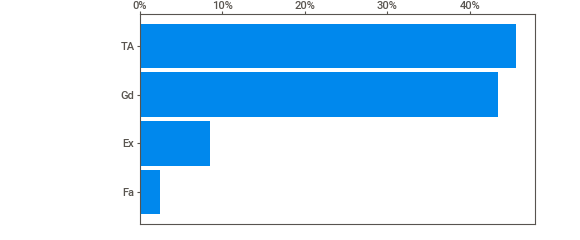
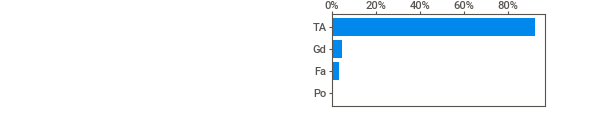
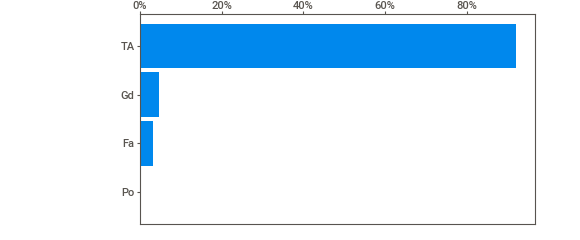
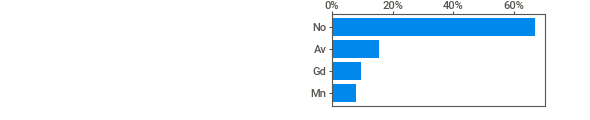
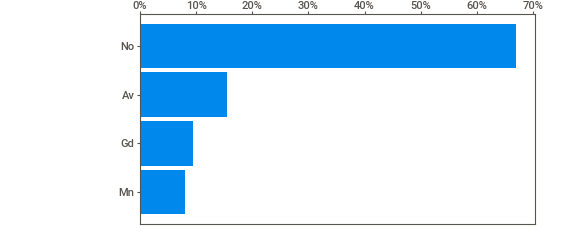
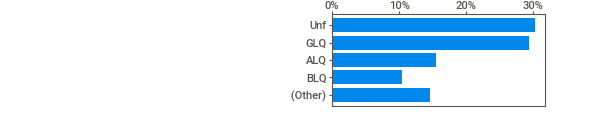
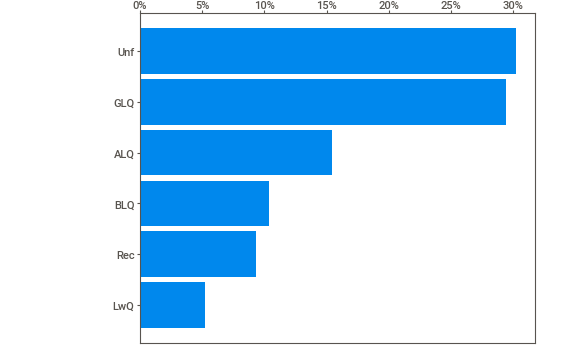
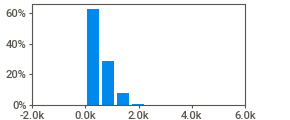
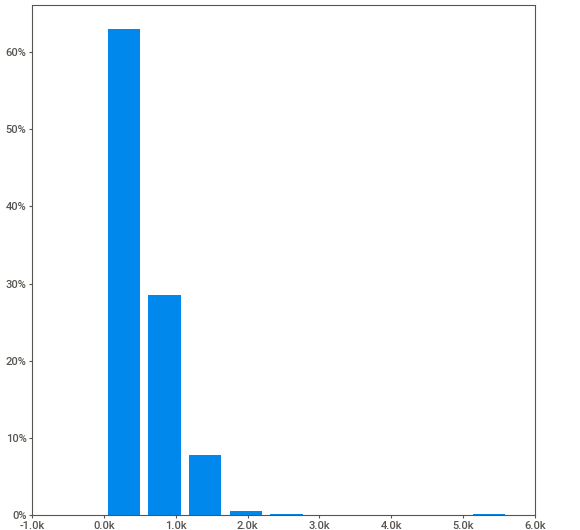
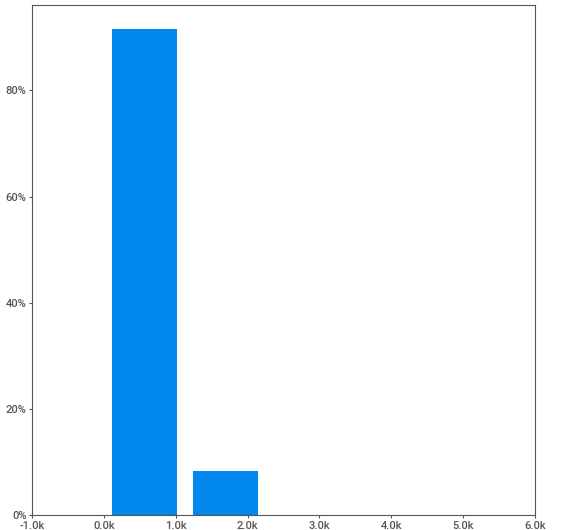
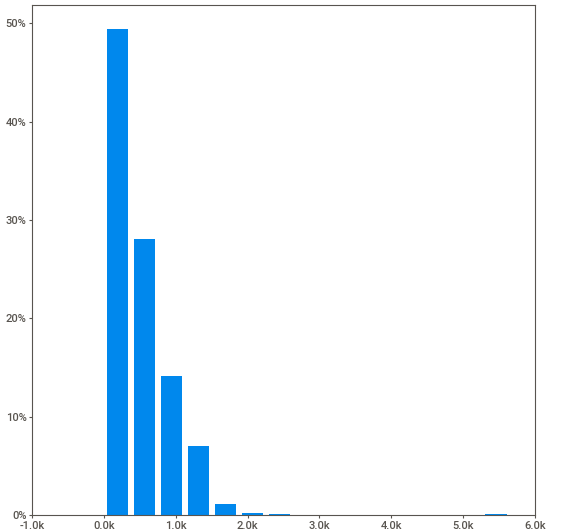
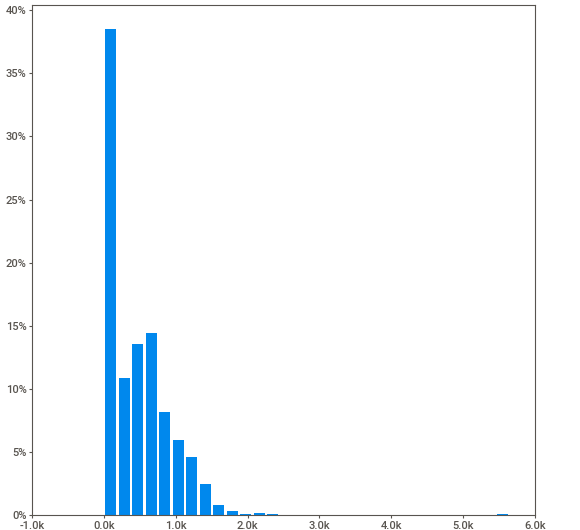
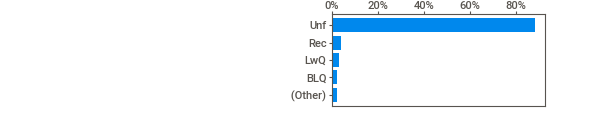
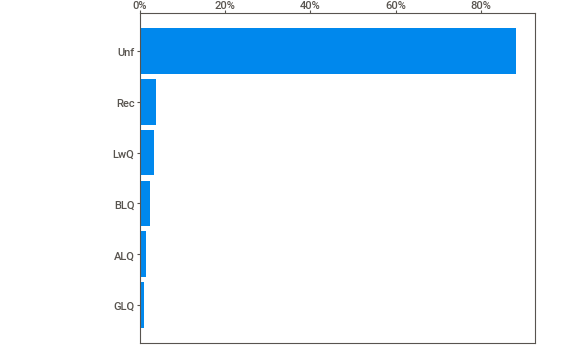
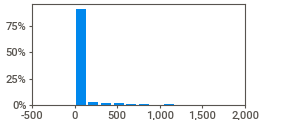
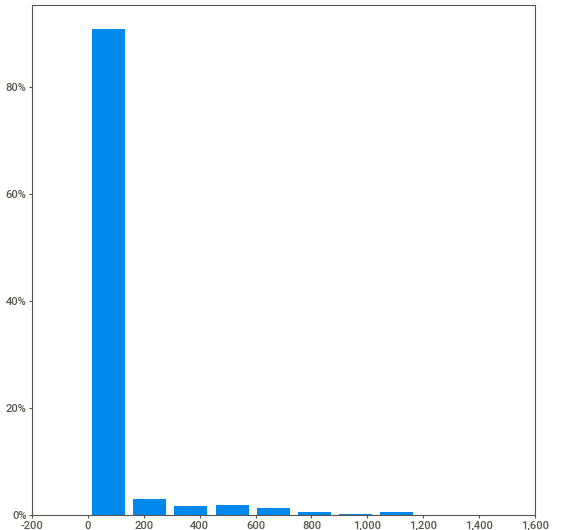
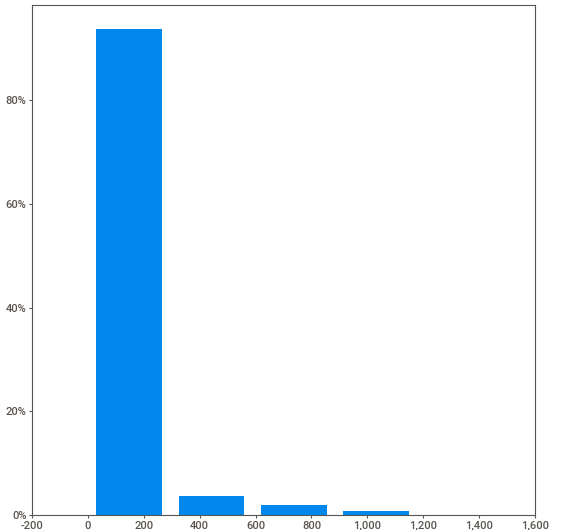
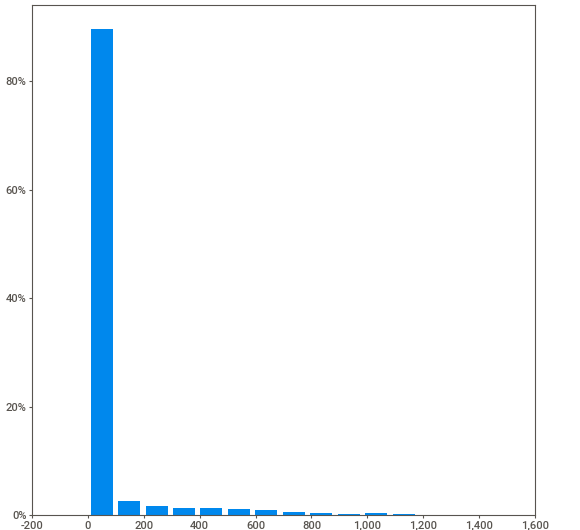
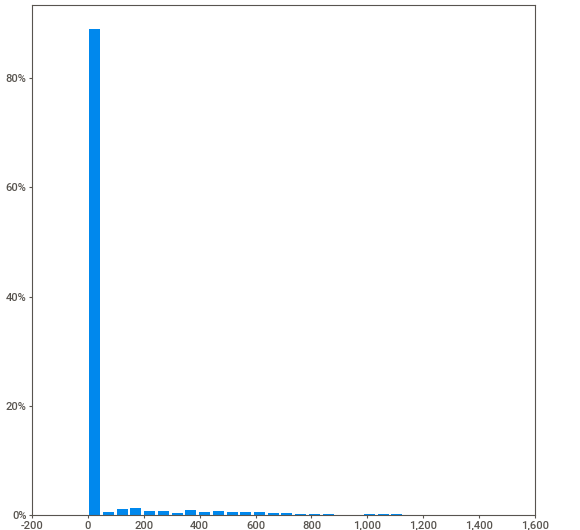
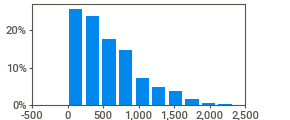
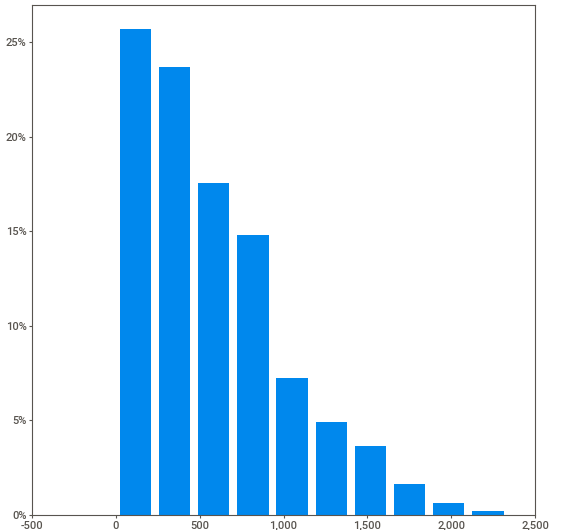
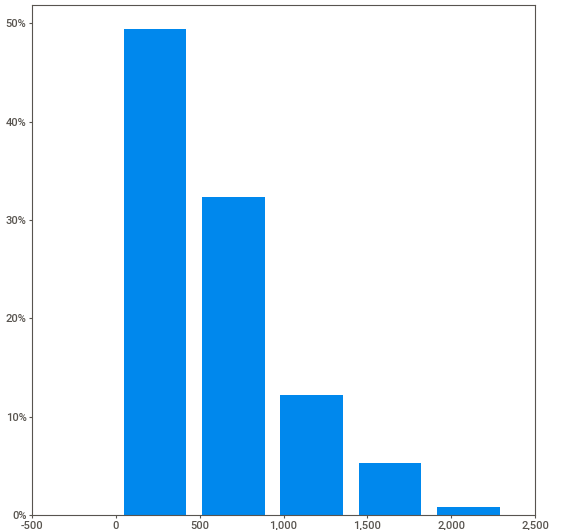
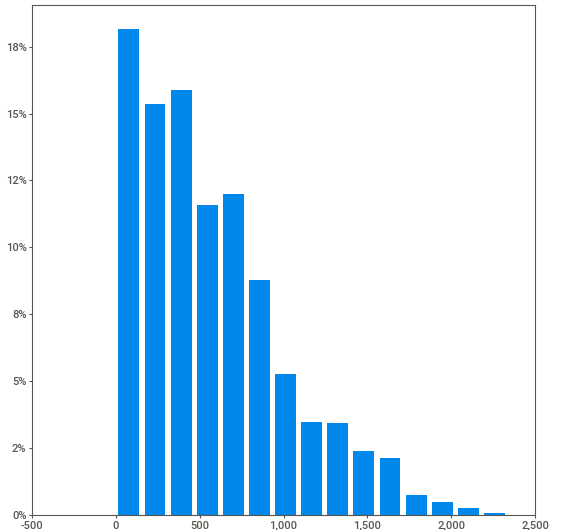
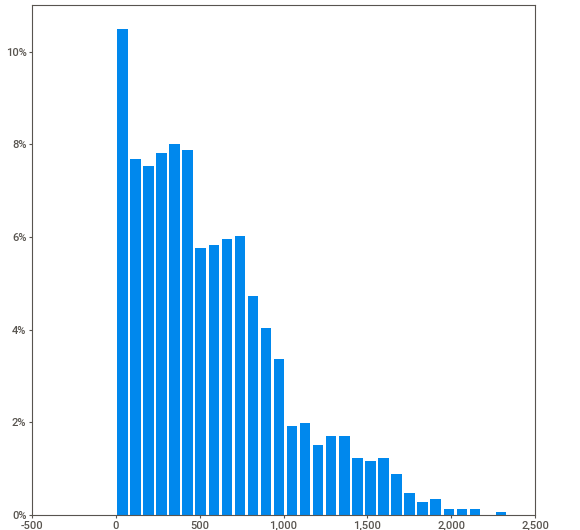
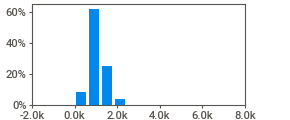
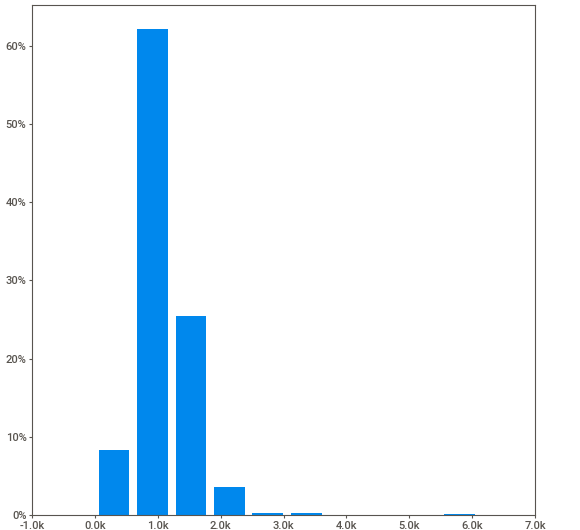
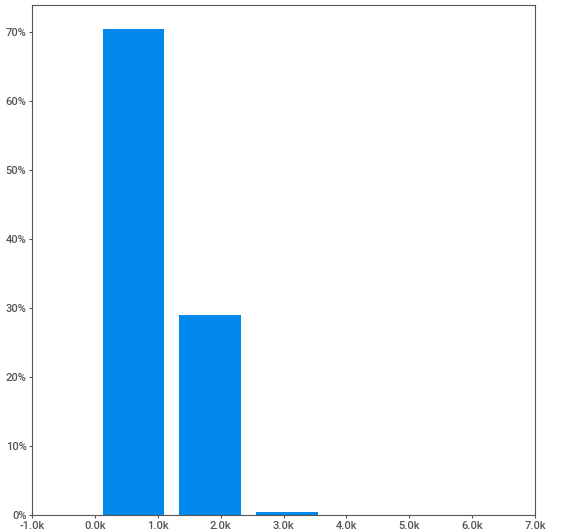
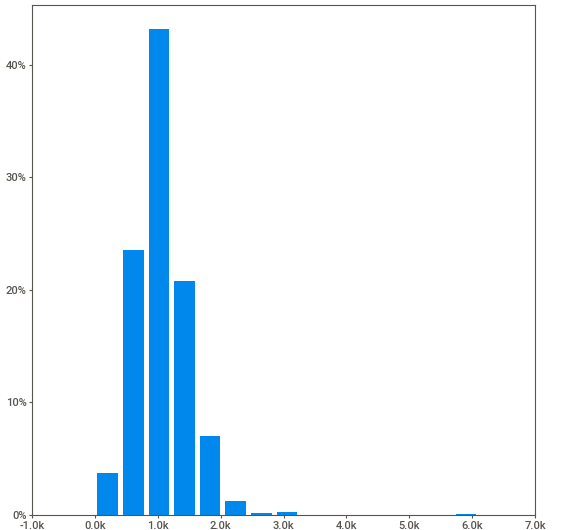
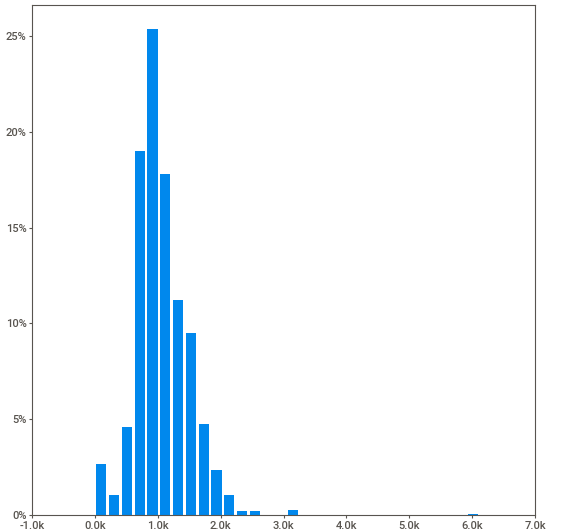
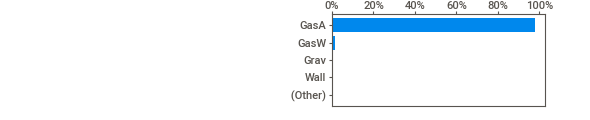
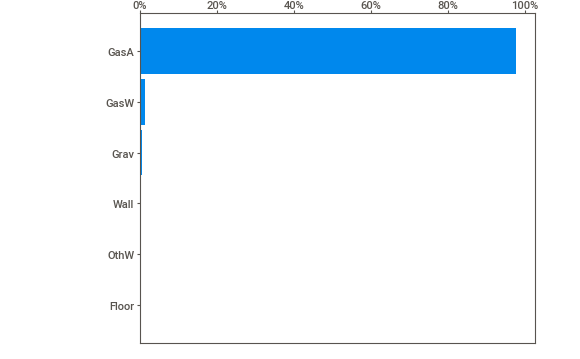
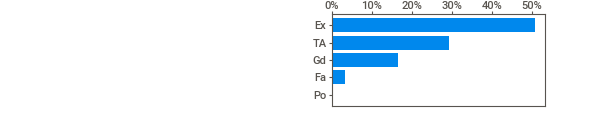
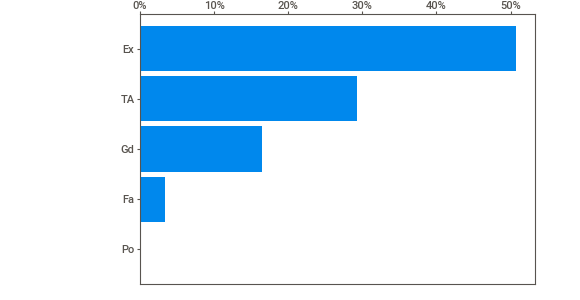
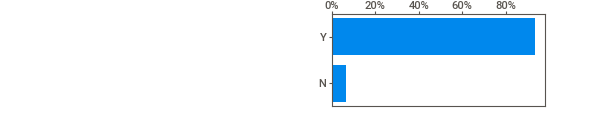
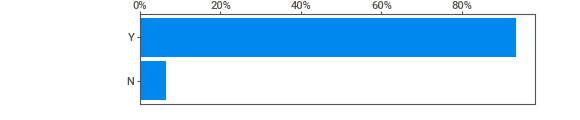
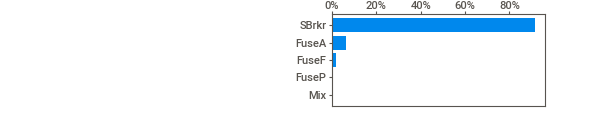
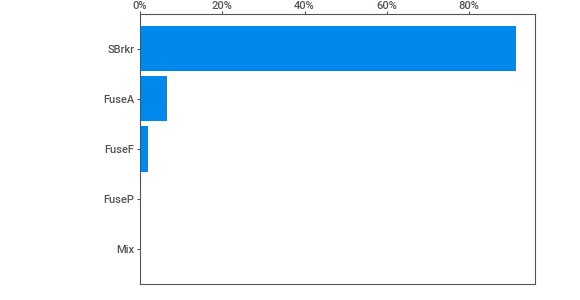
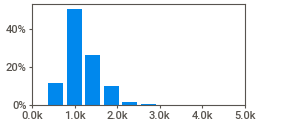
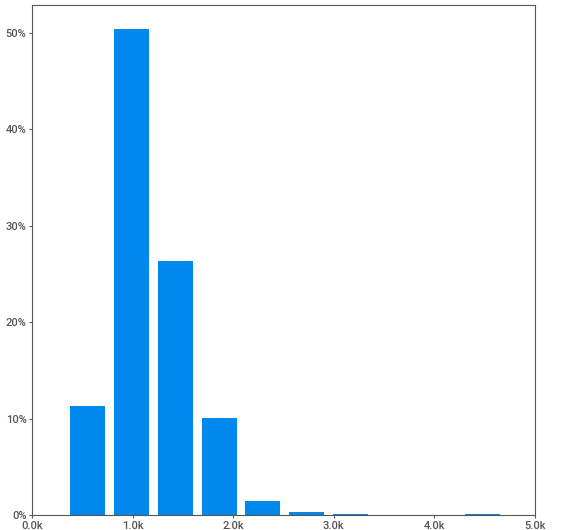
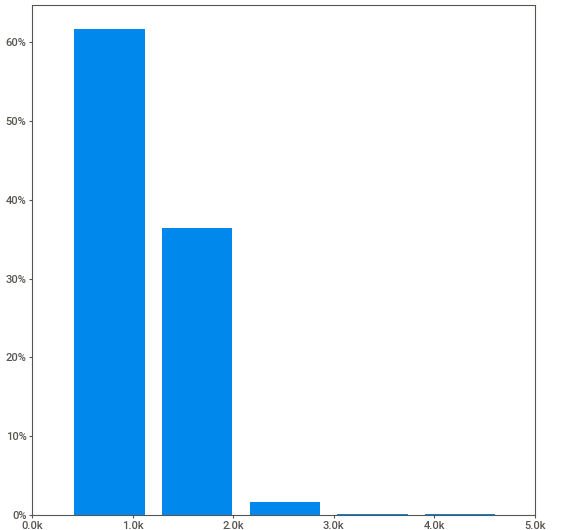
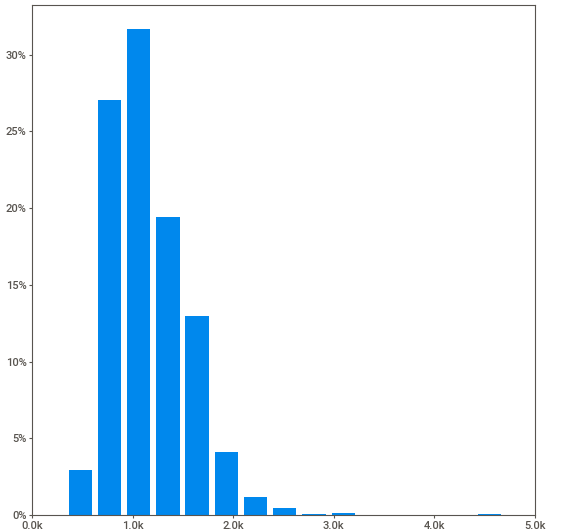
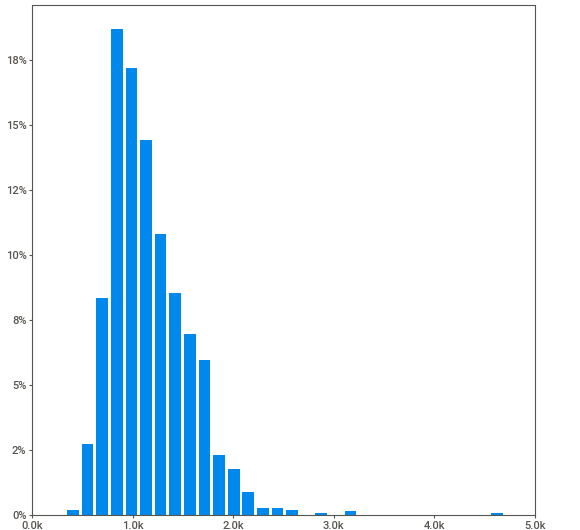
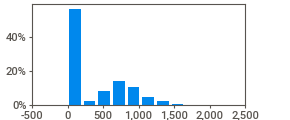
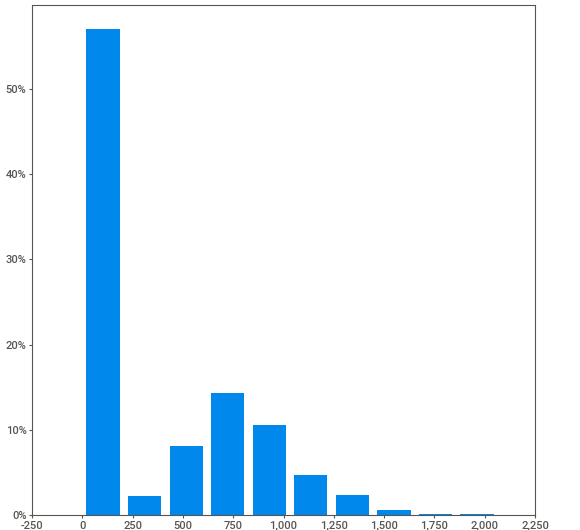
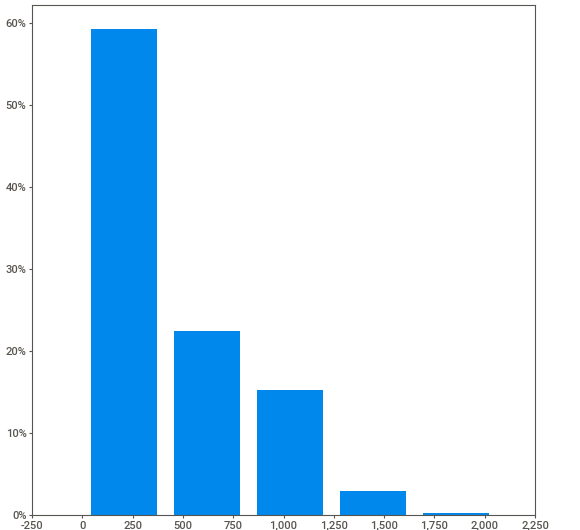
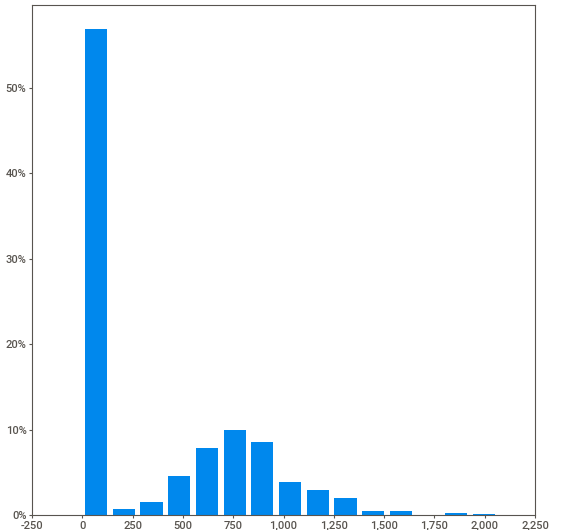
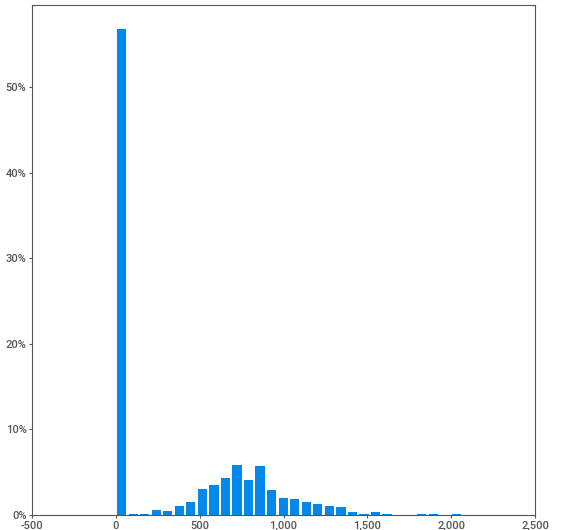
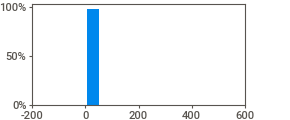
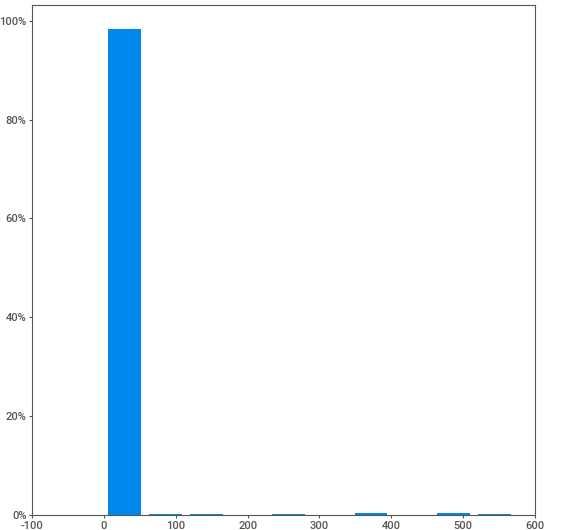
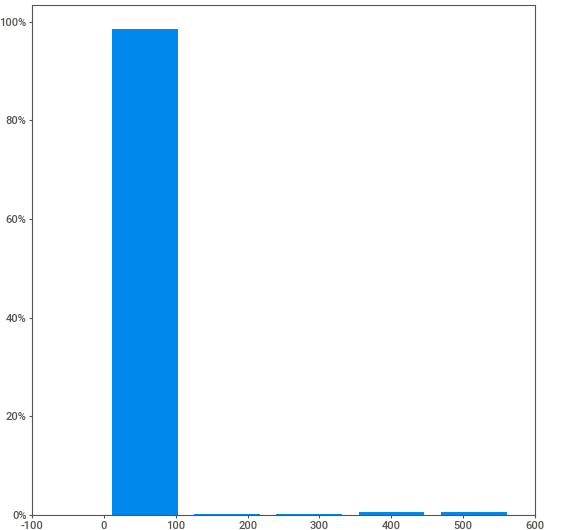
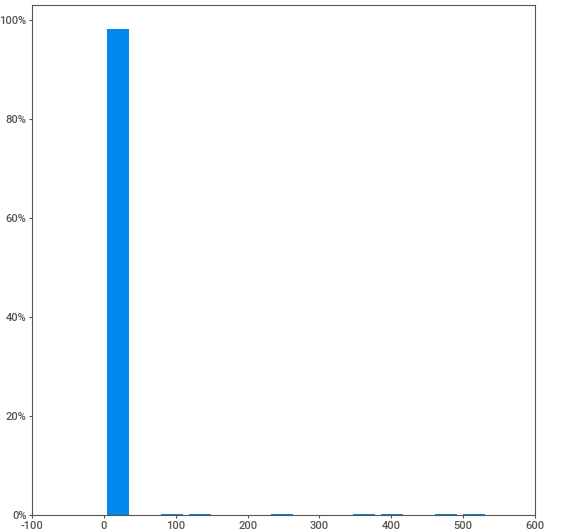
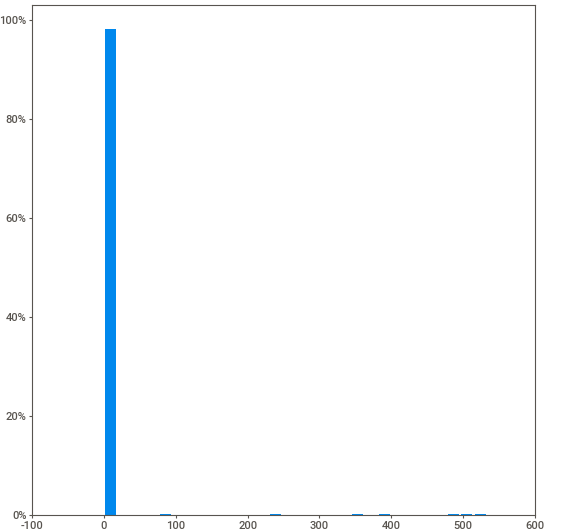
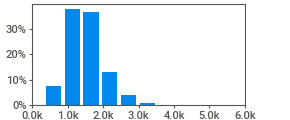
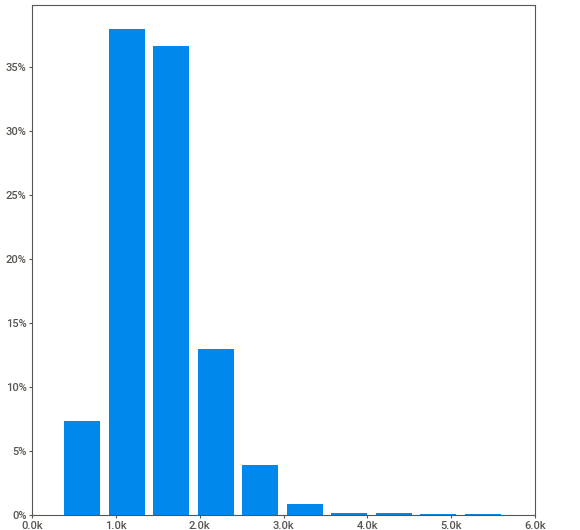
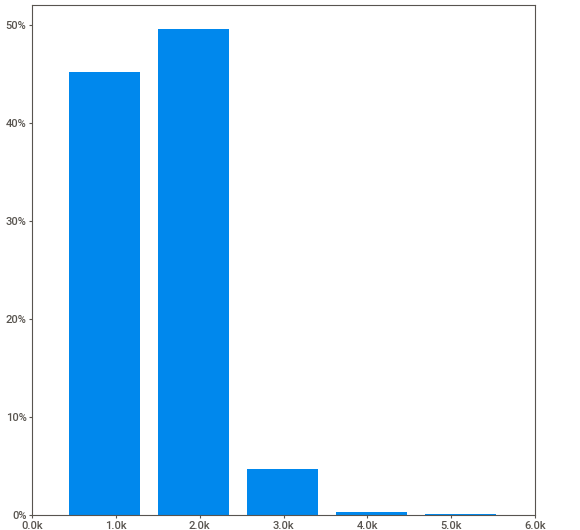
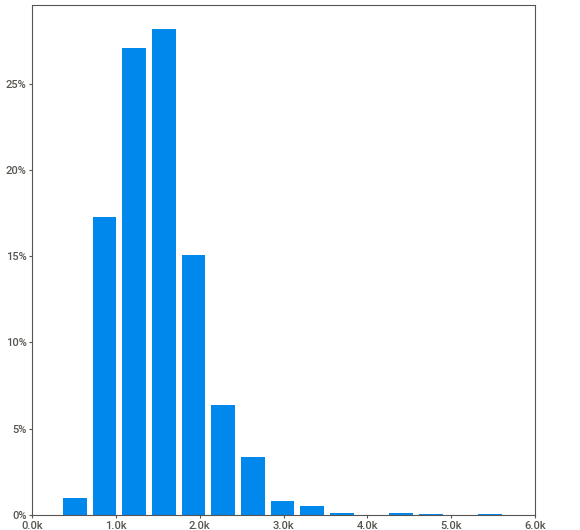
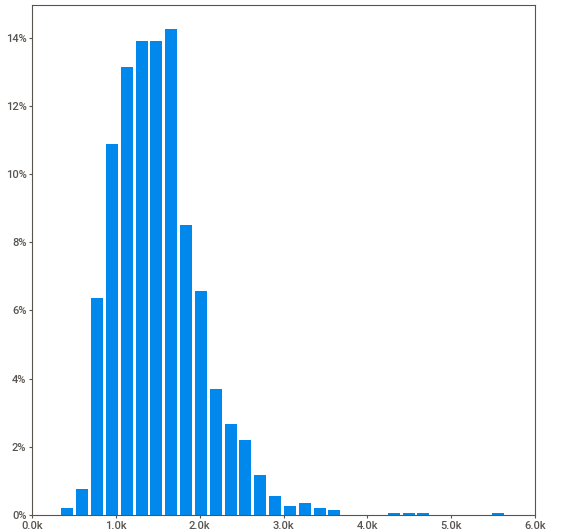
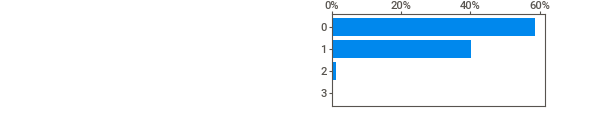
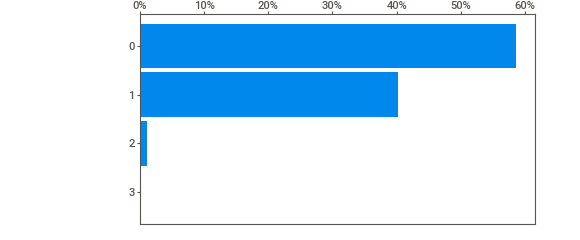
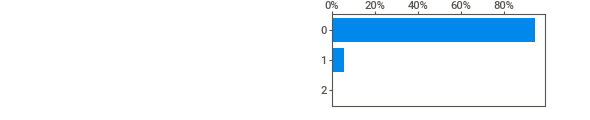
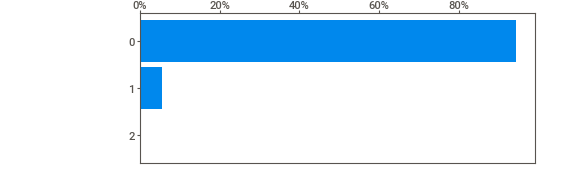
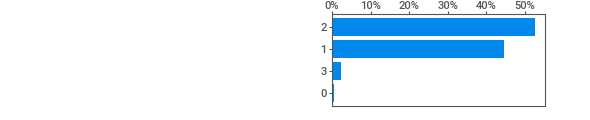
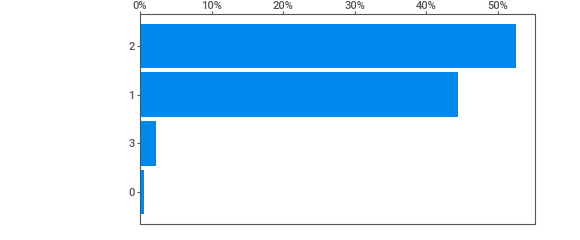
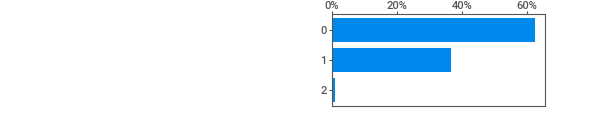
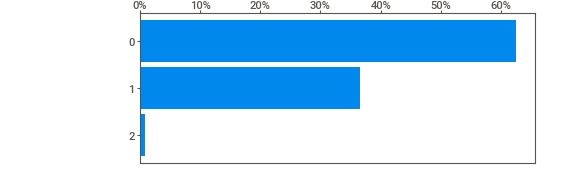
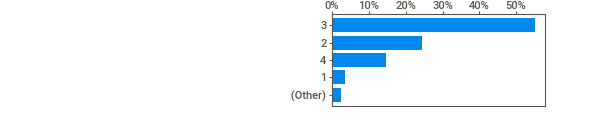
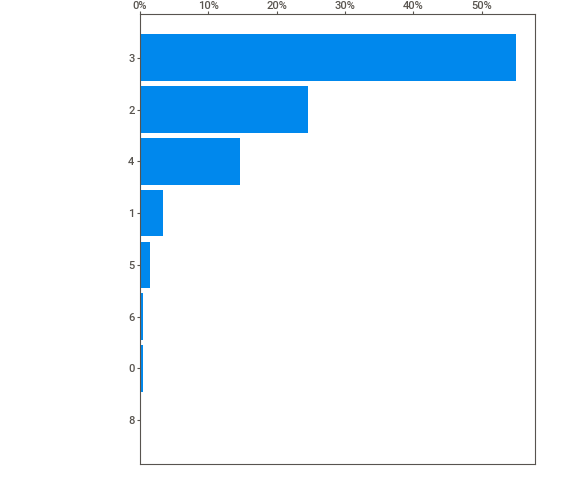
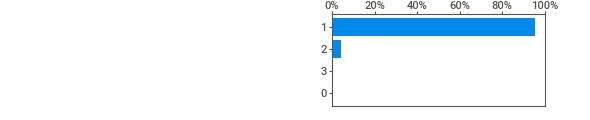
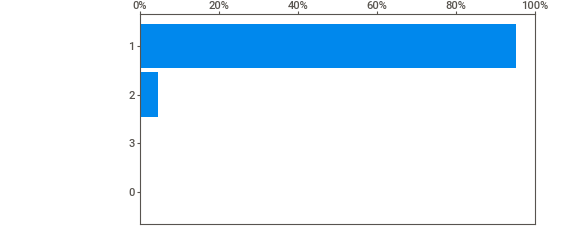
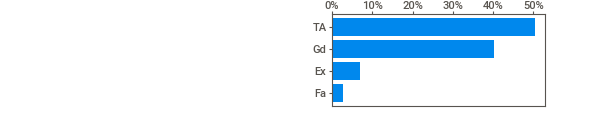
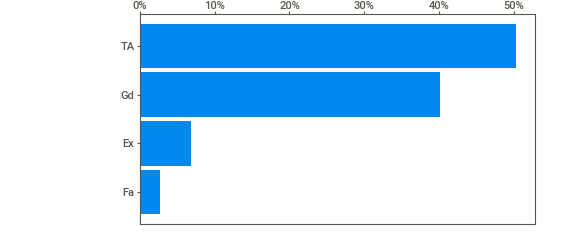
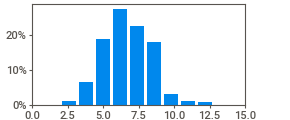
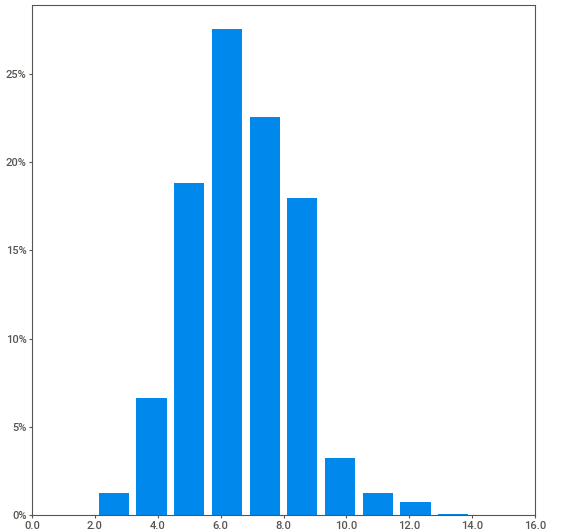
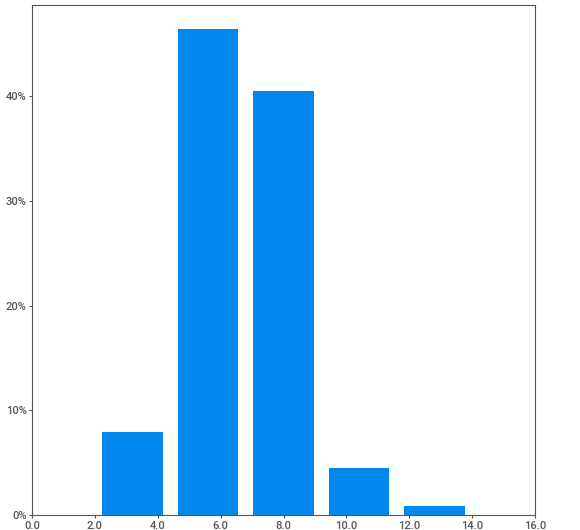
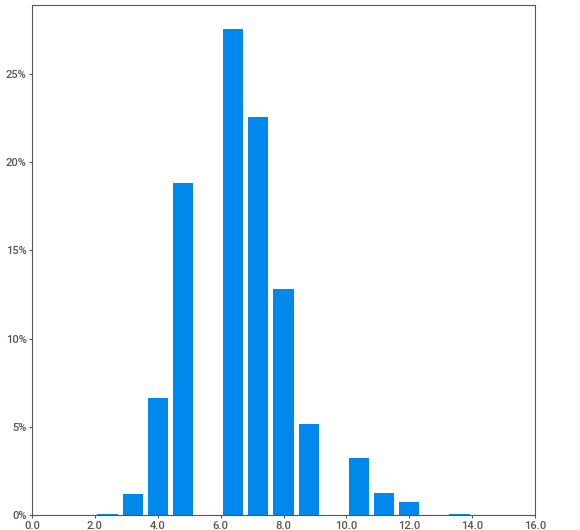
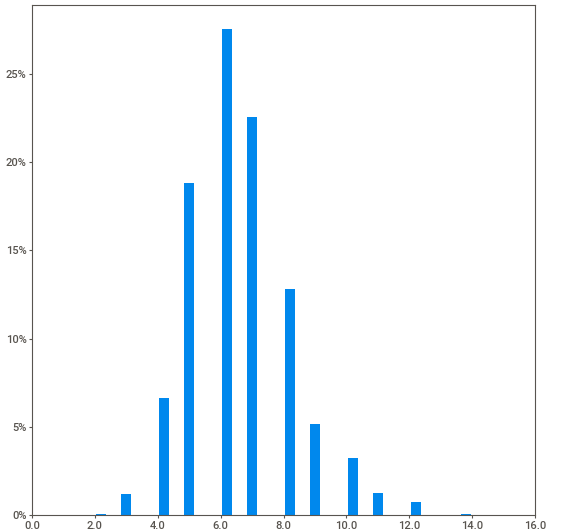
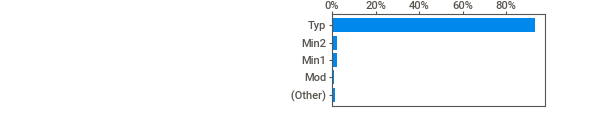
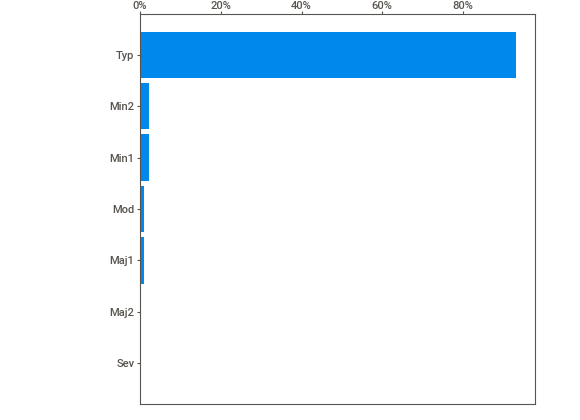
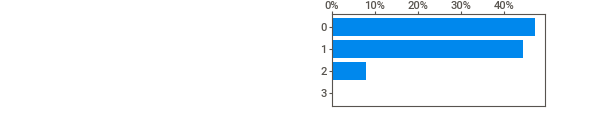
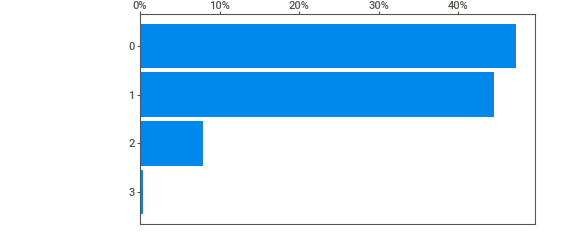
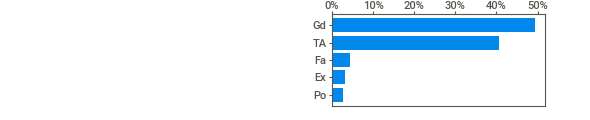
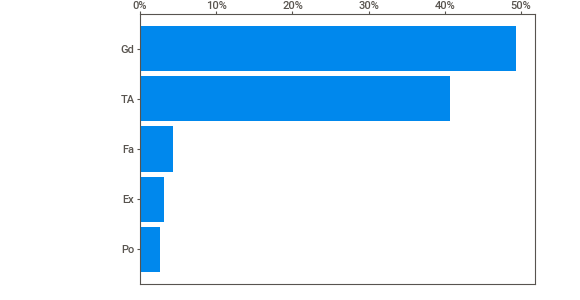
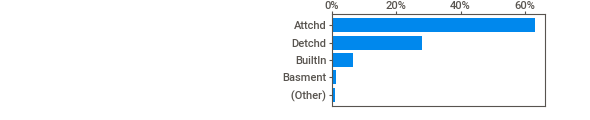
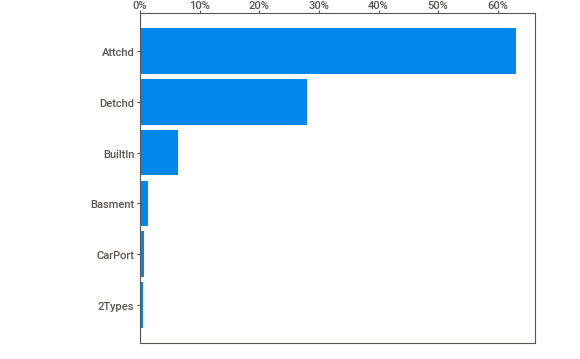
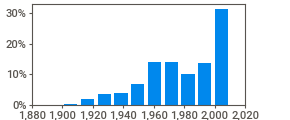
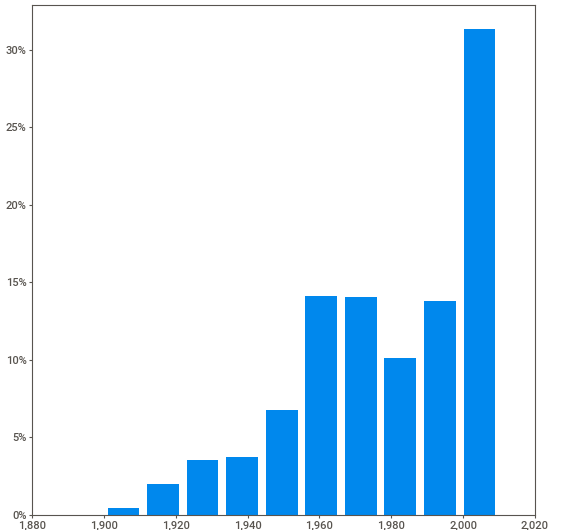
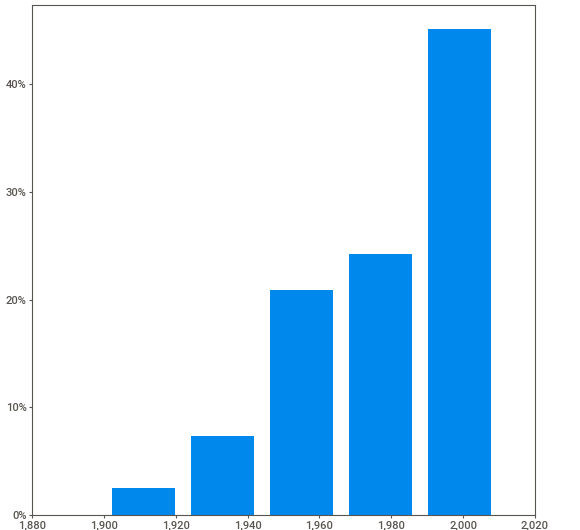
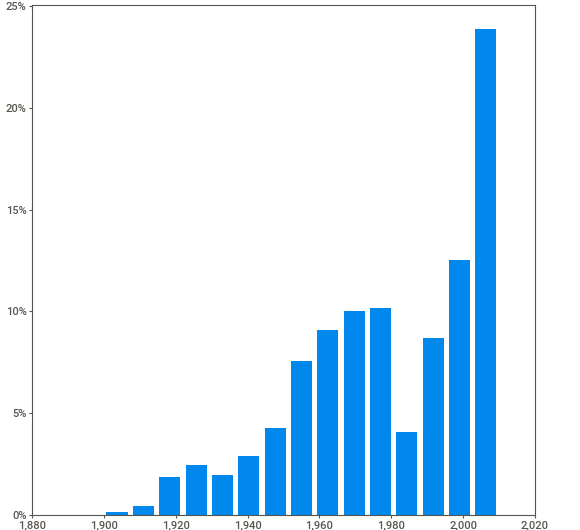
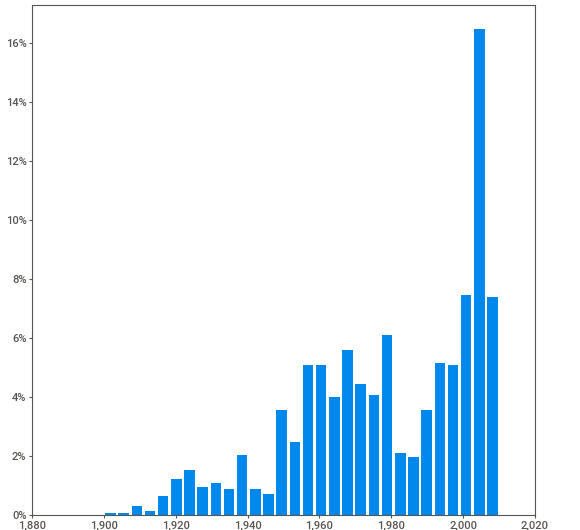
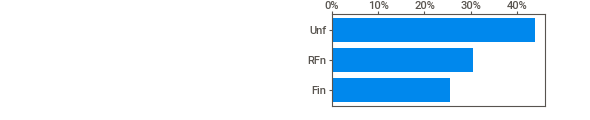
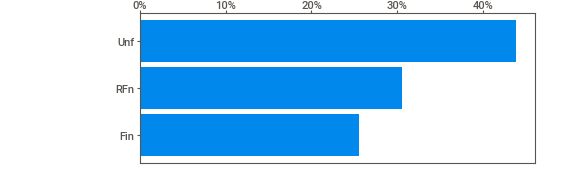
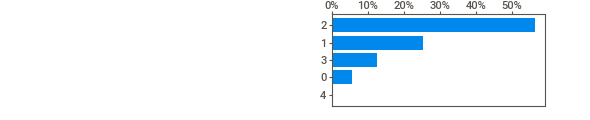
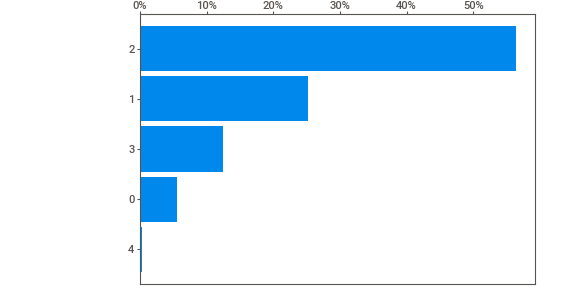
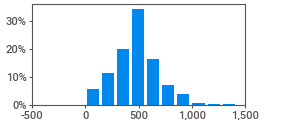
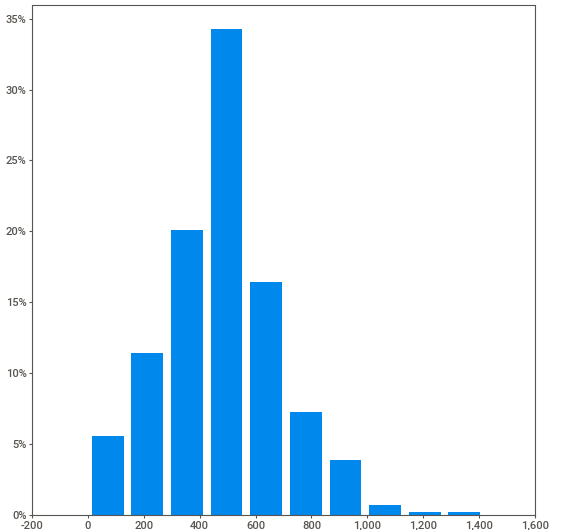
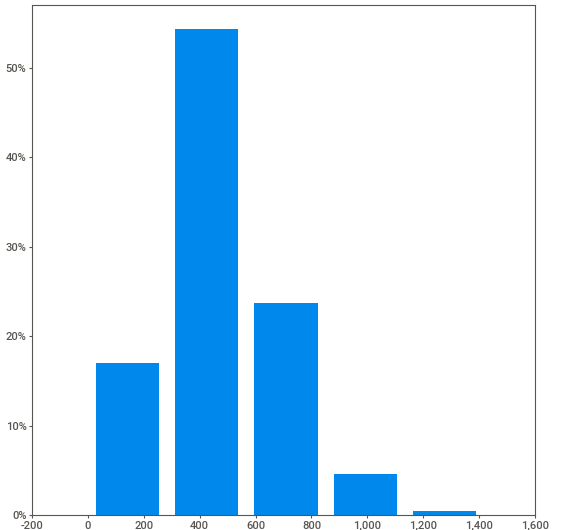
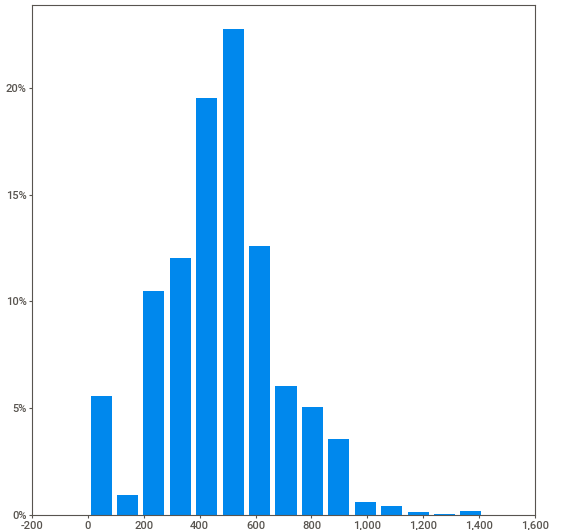
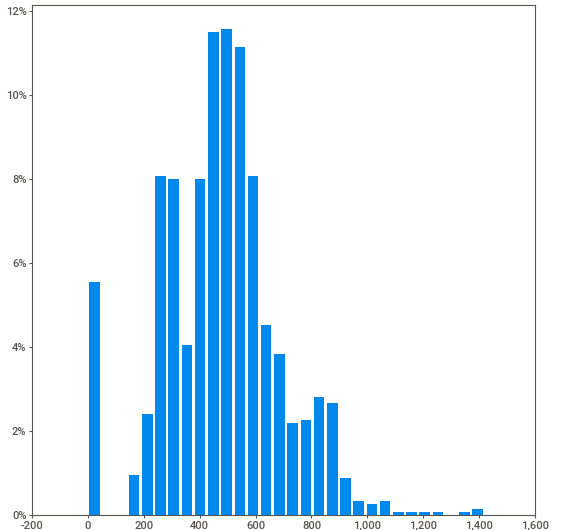
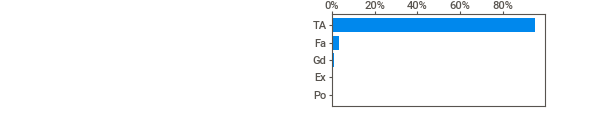
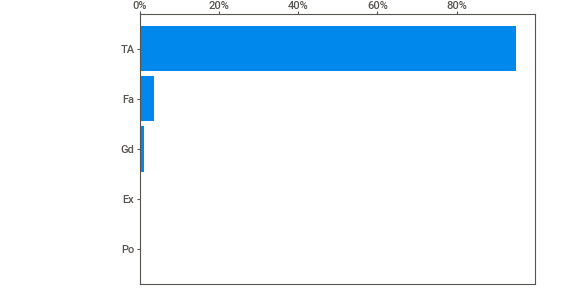
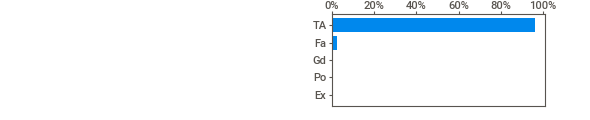
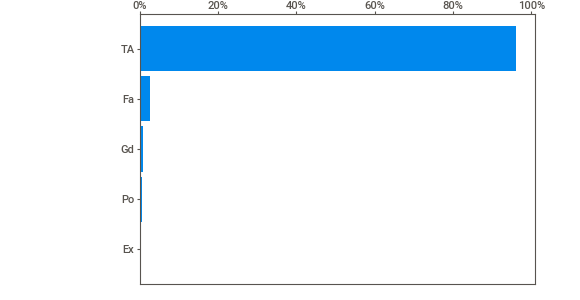
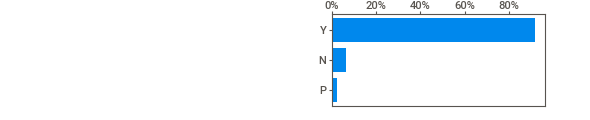
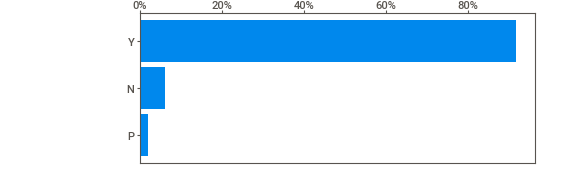
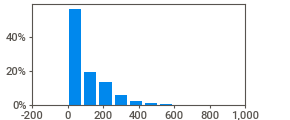
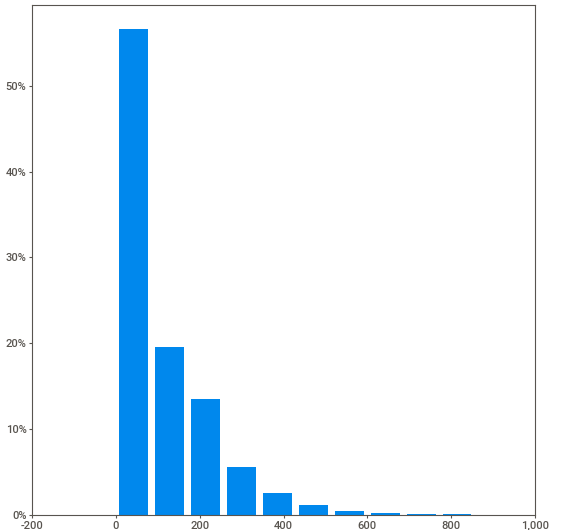
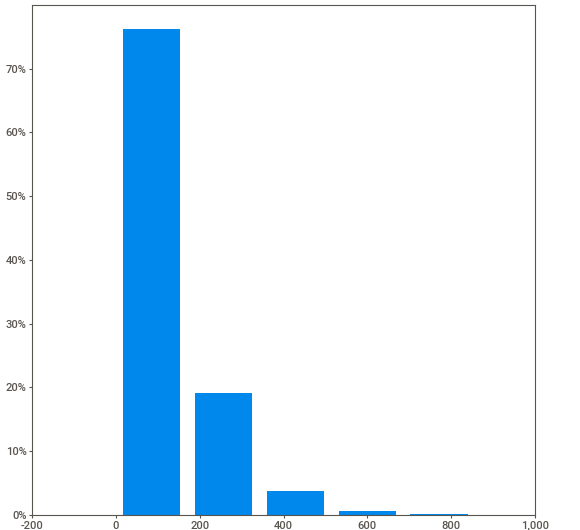
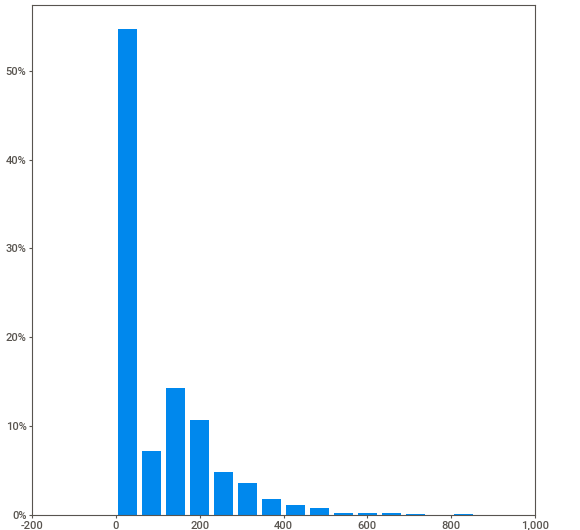
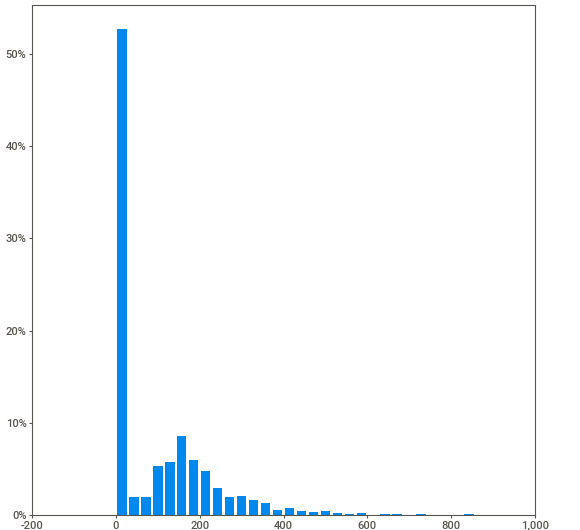
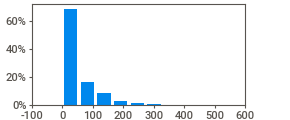
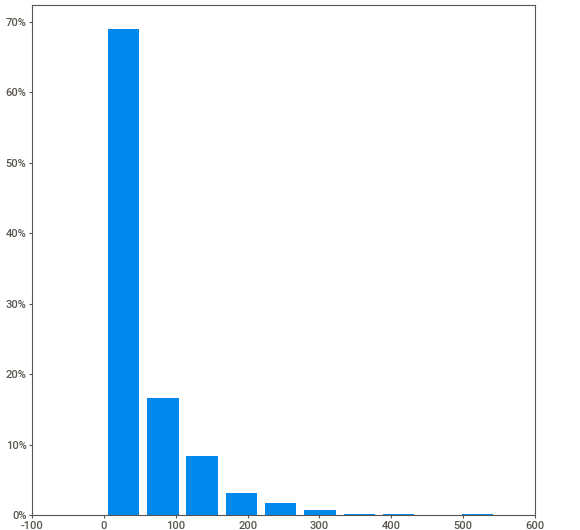
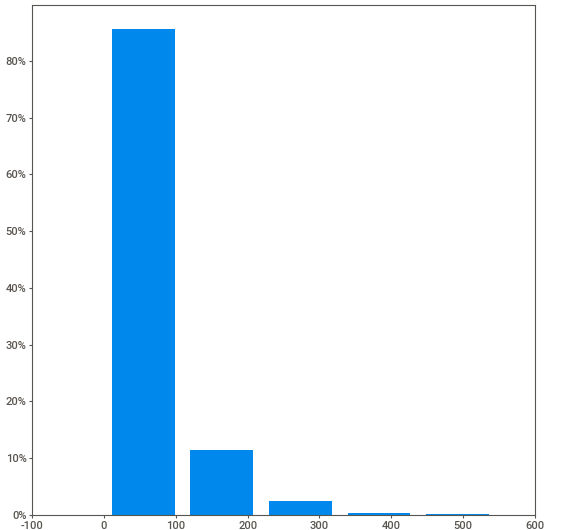
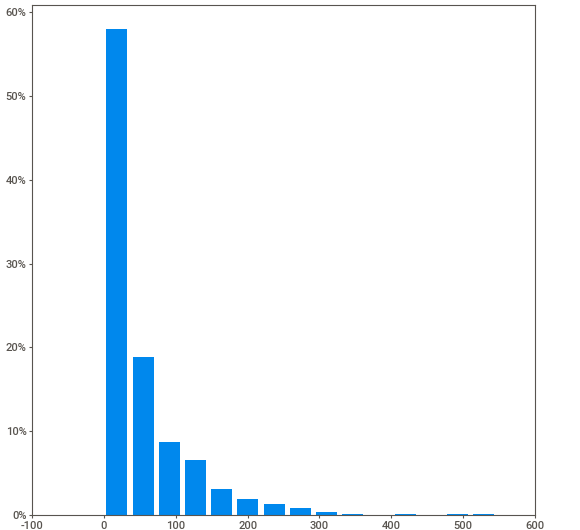
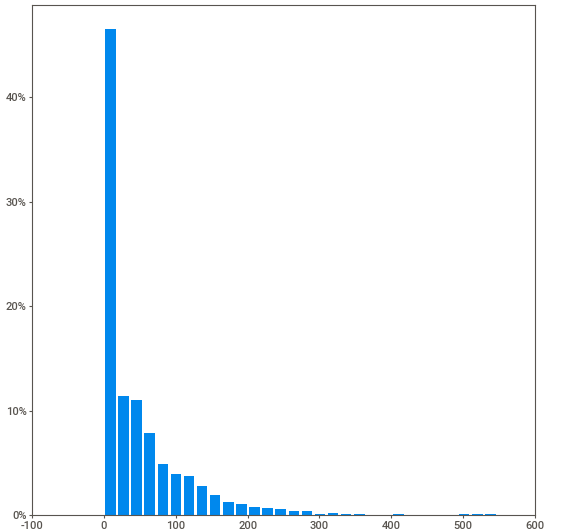
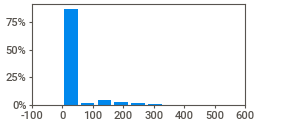
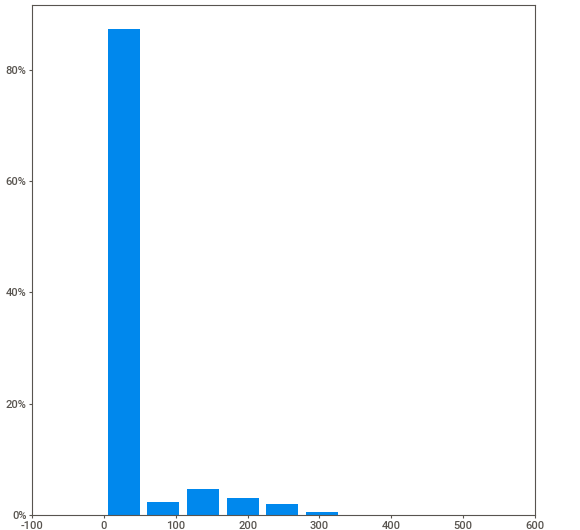
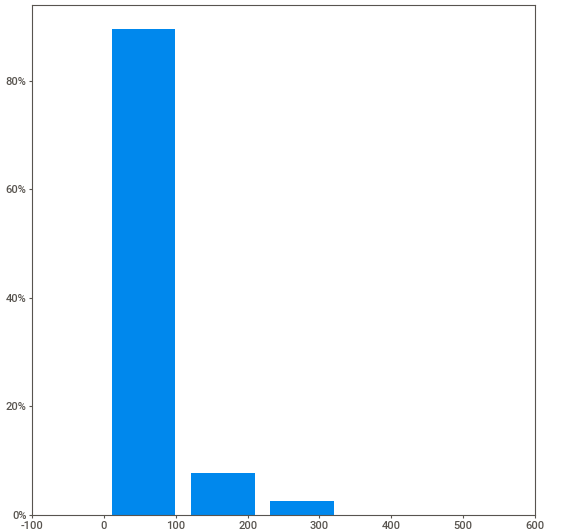
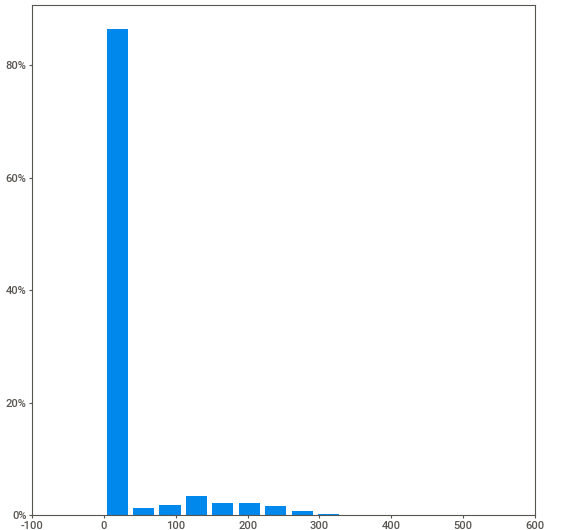
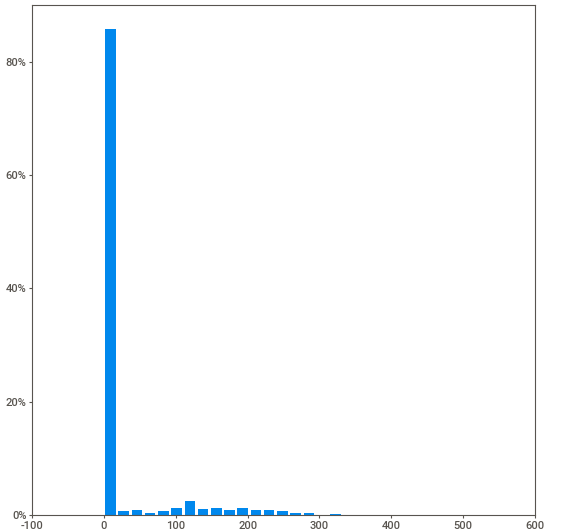
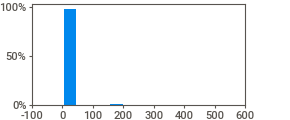
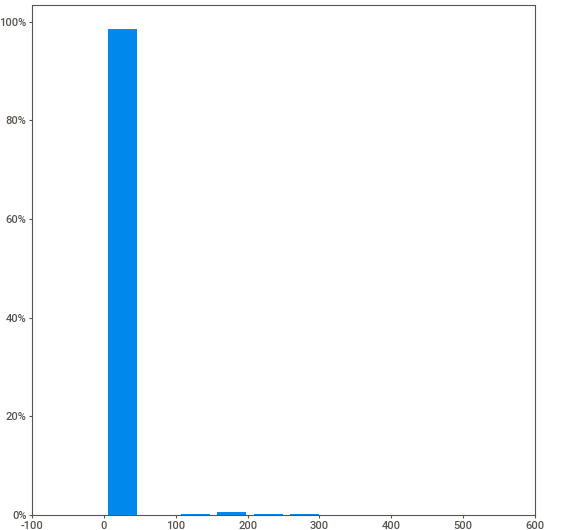
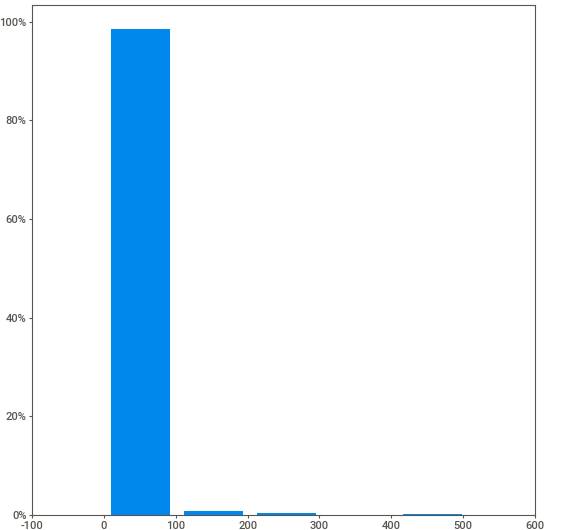
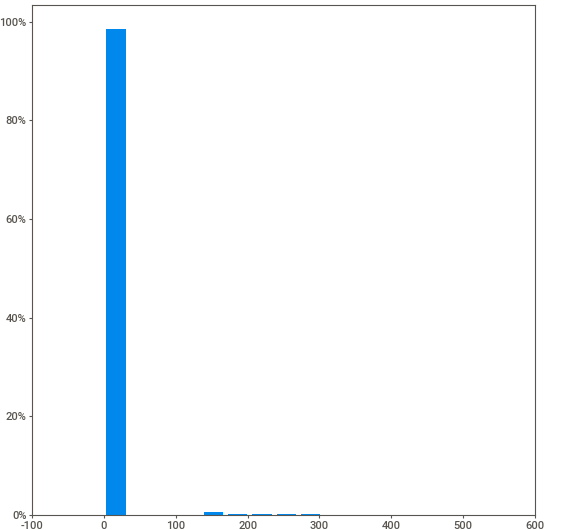
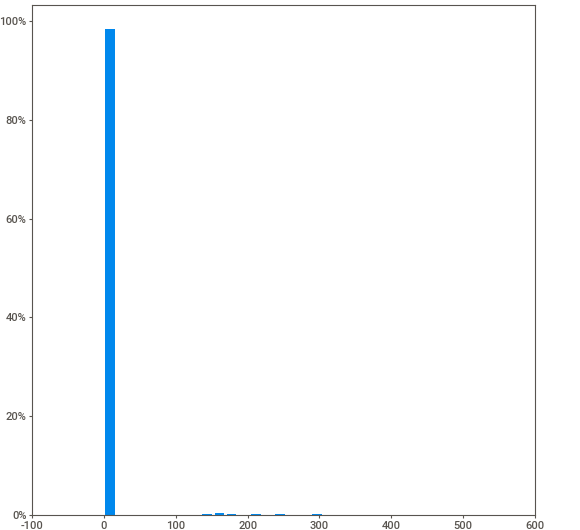
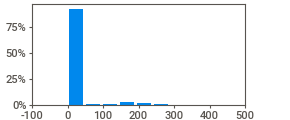
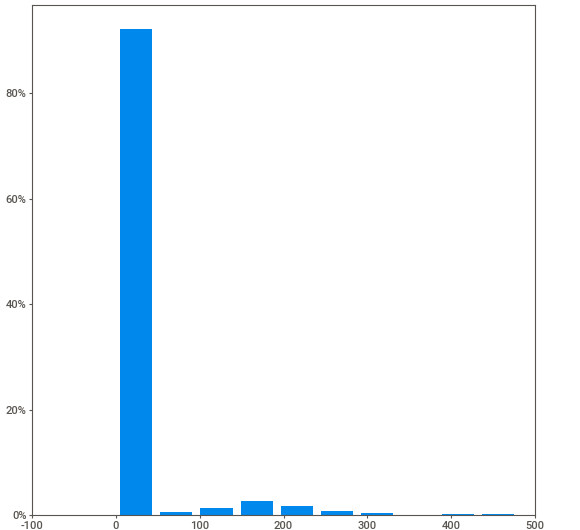
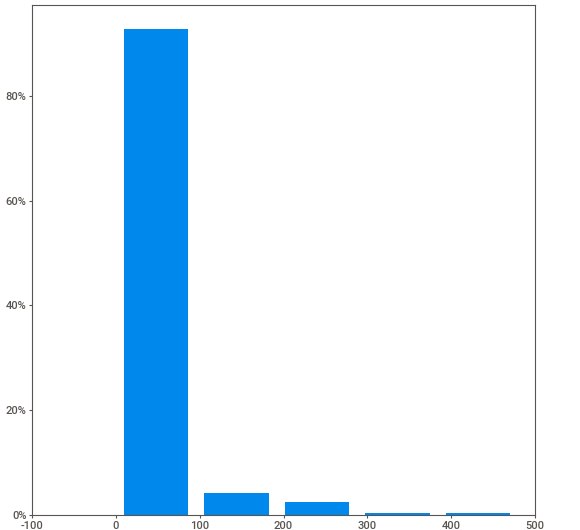
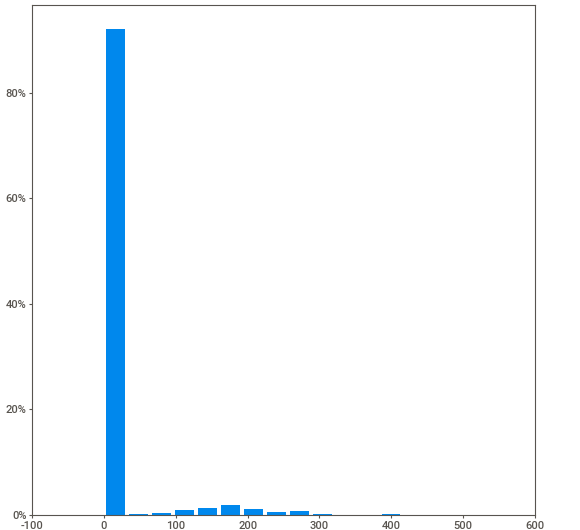
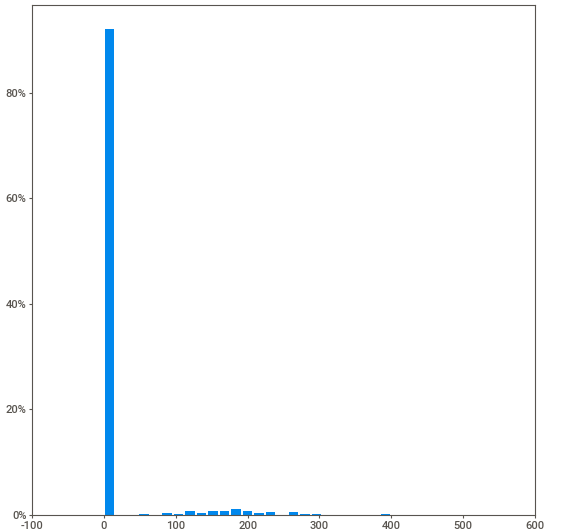
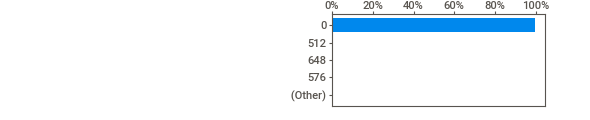
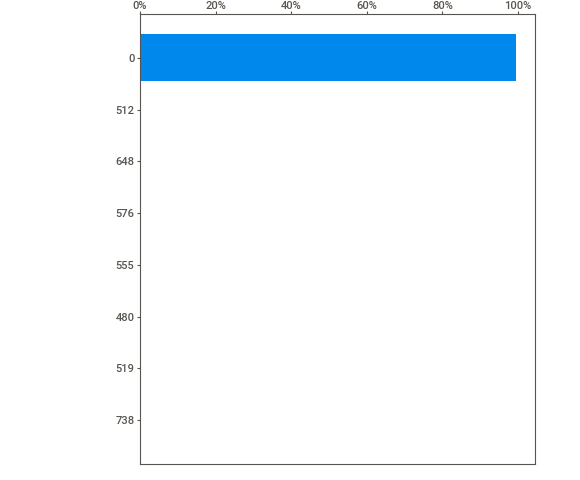
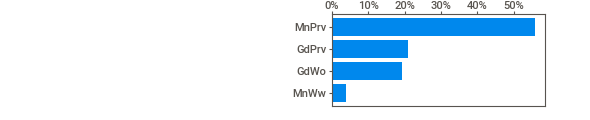
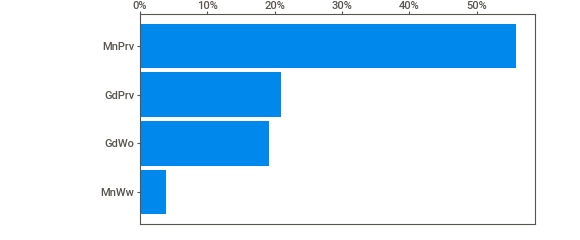
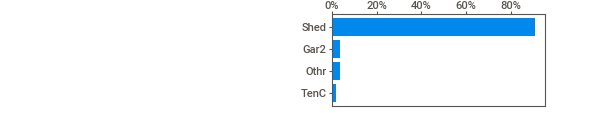
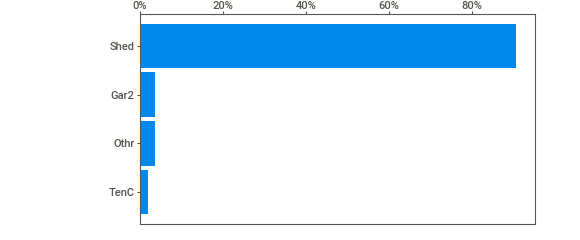
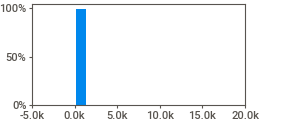
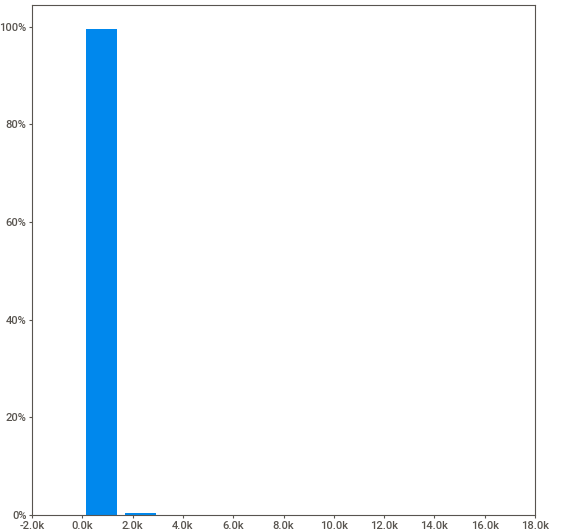
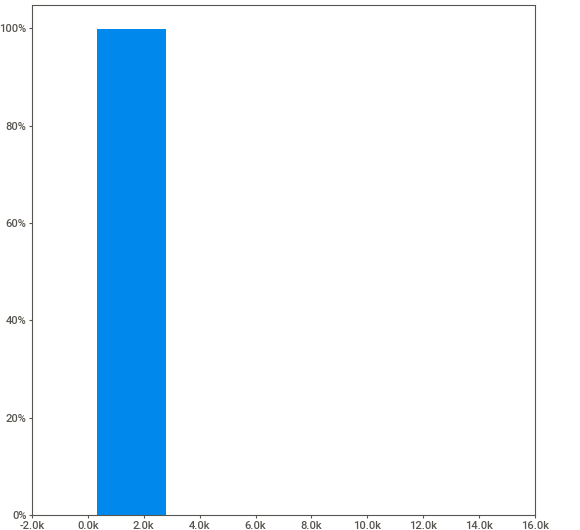
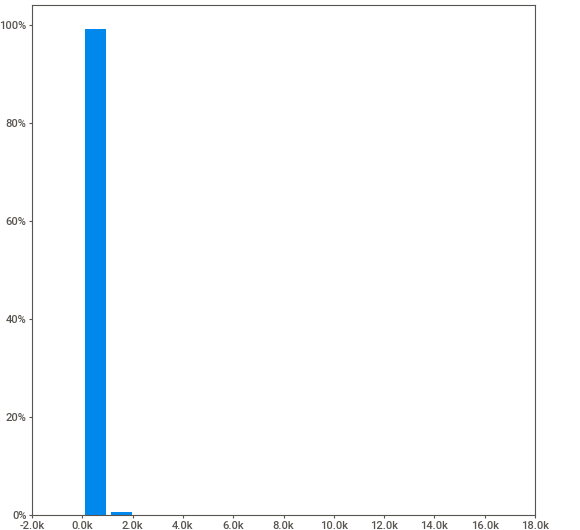
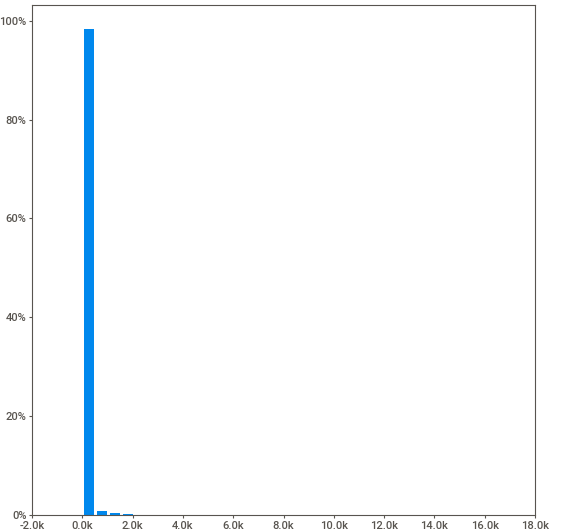
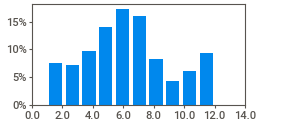
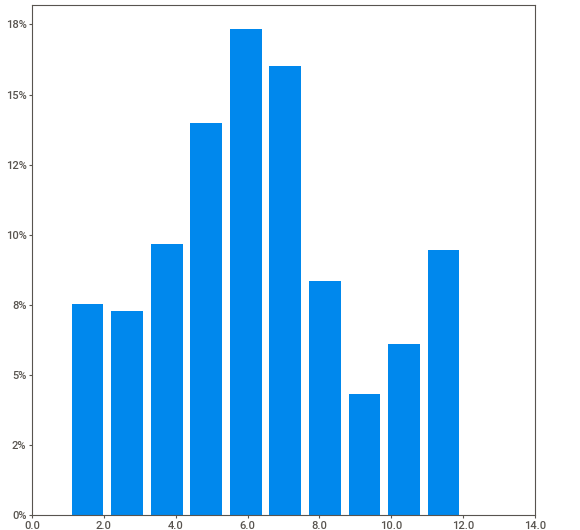
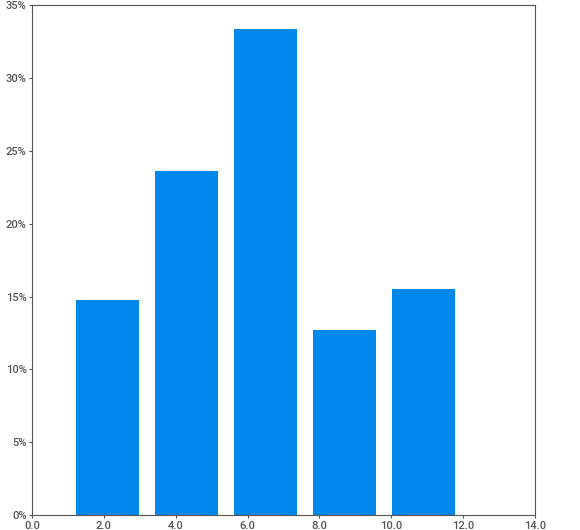
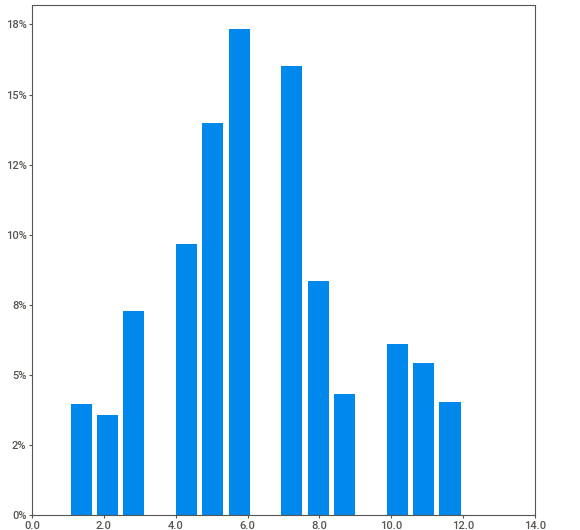
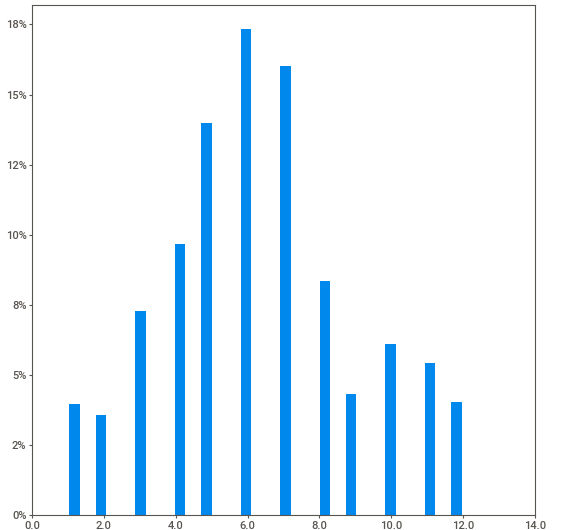
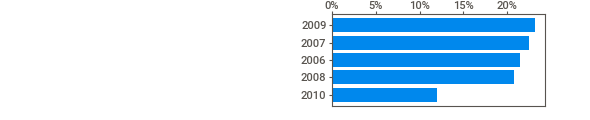
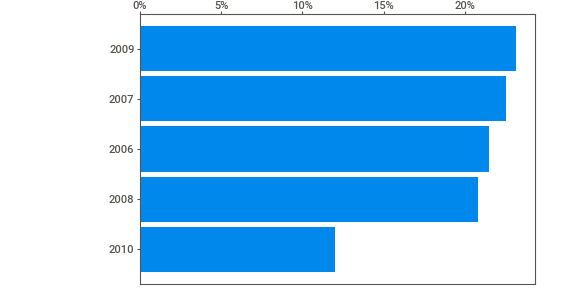
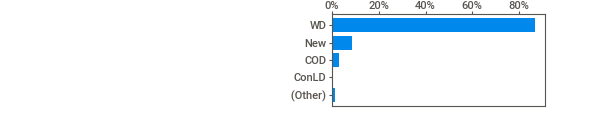
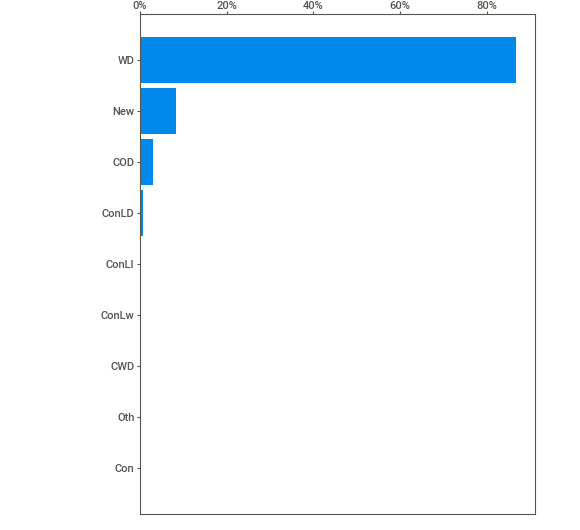
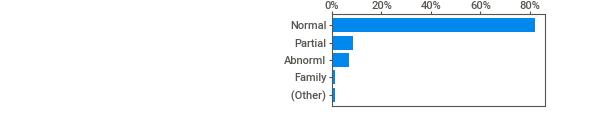
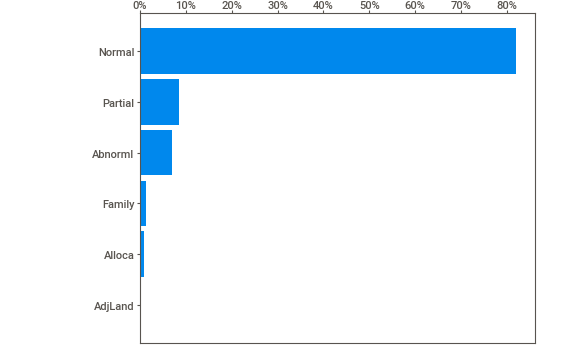
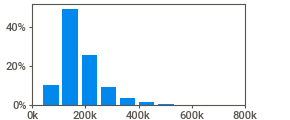
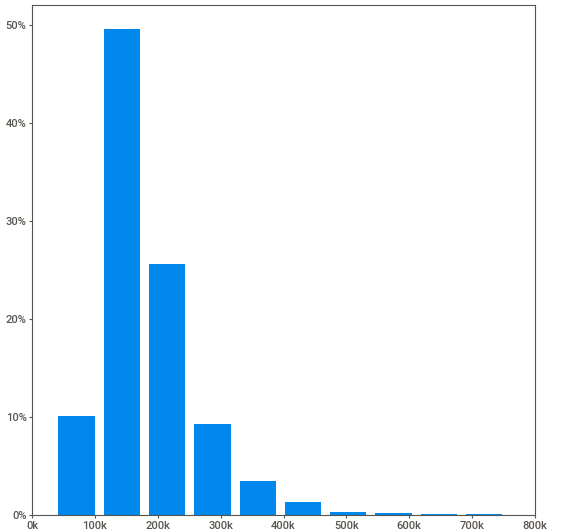
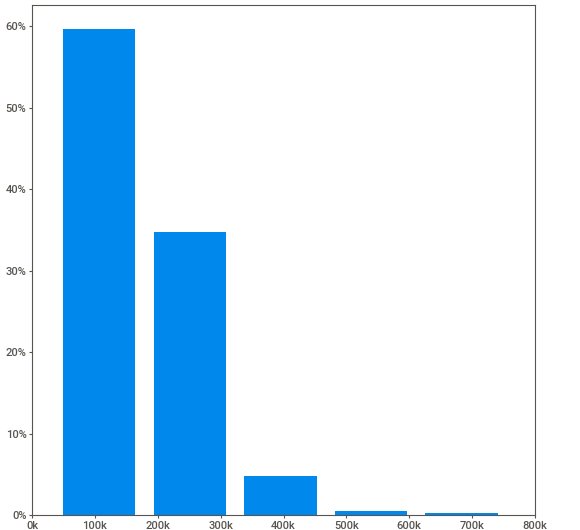
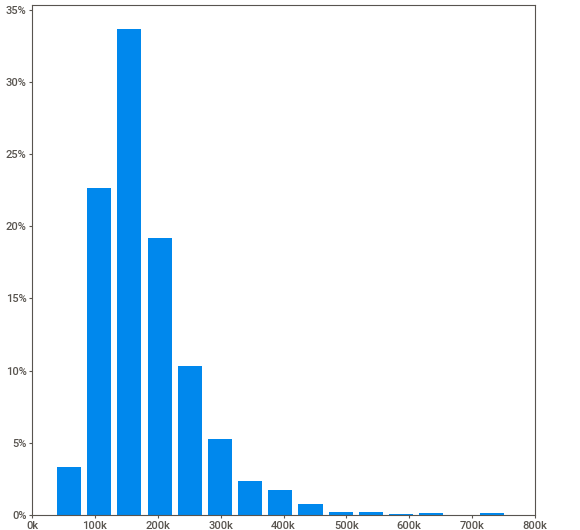
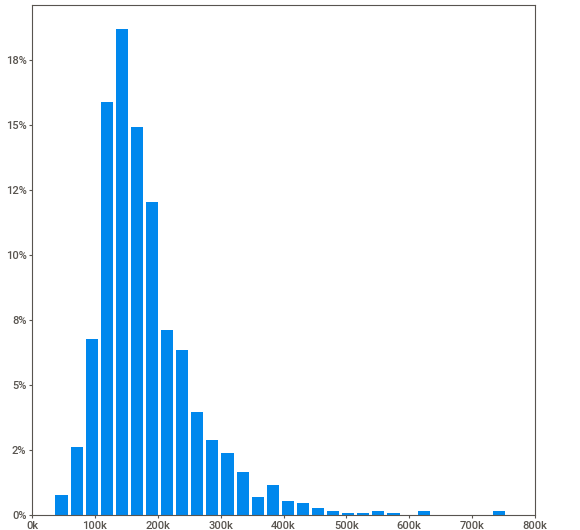
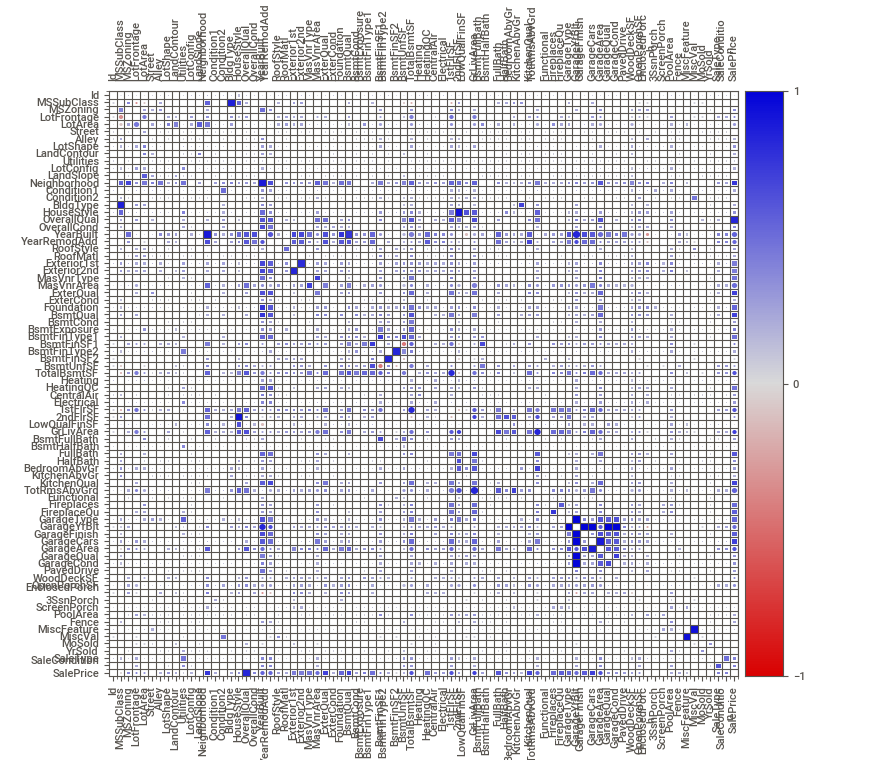
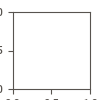

In [5]:
#  use sweetviz and show report on df

housePrice_report = sw.analyze(train_data)
housePrice_report.show_notebook(layout='vertical')

**remove few features beacuse there is too much null data**

In [6]:
train_data = train_data.drop(['PoolQC', 'MiscFeature','Alley','Fence','Id'], axis = 1)
train_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

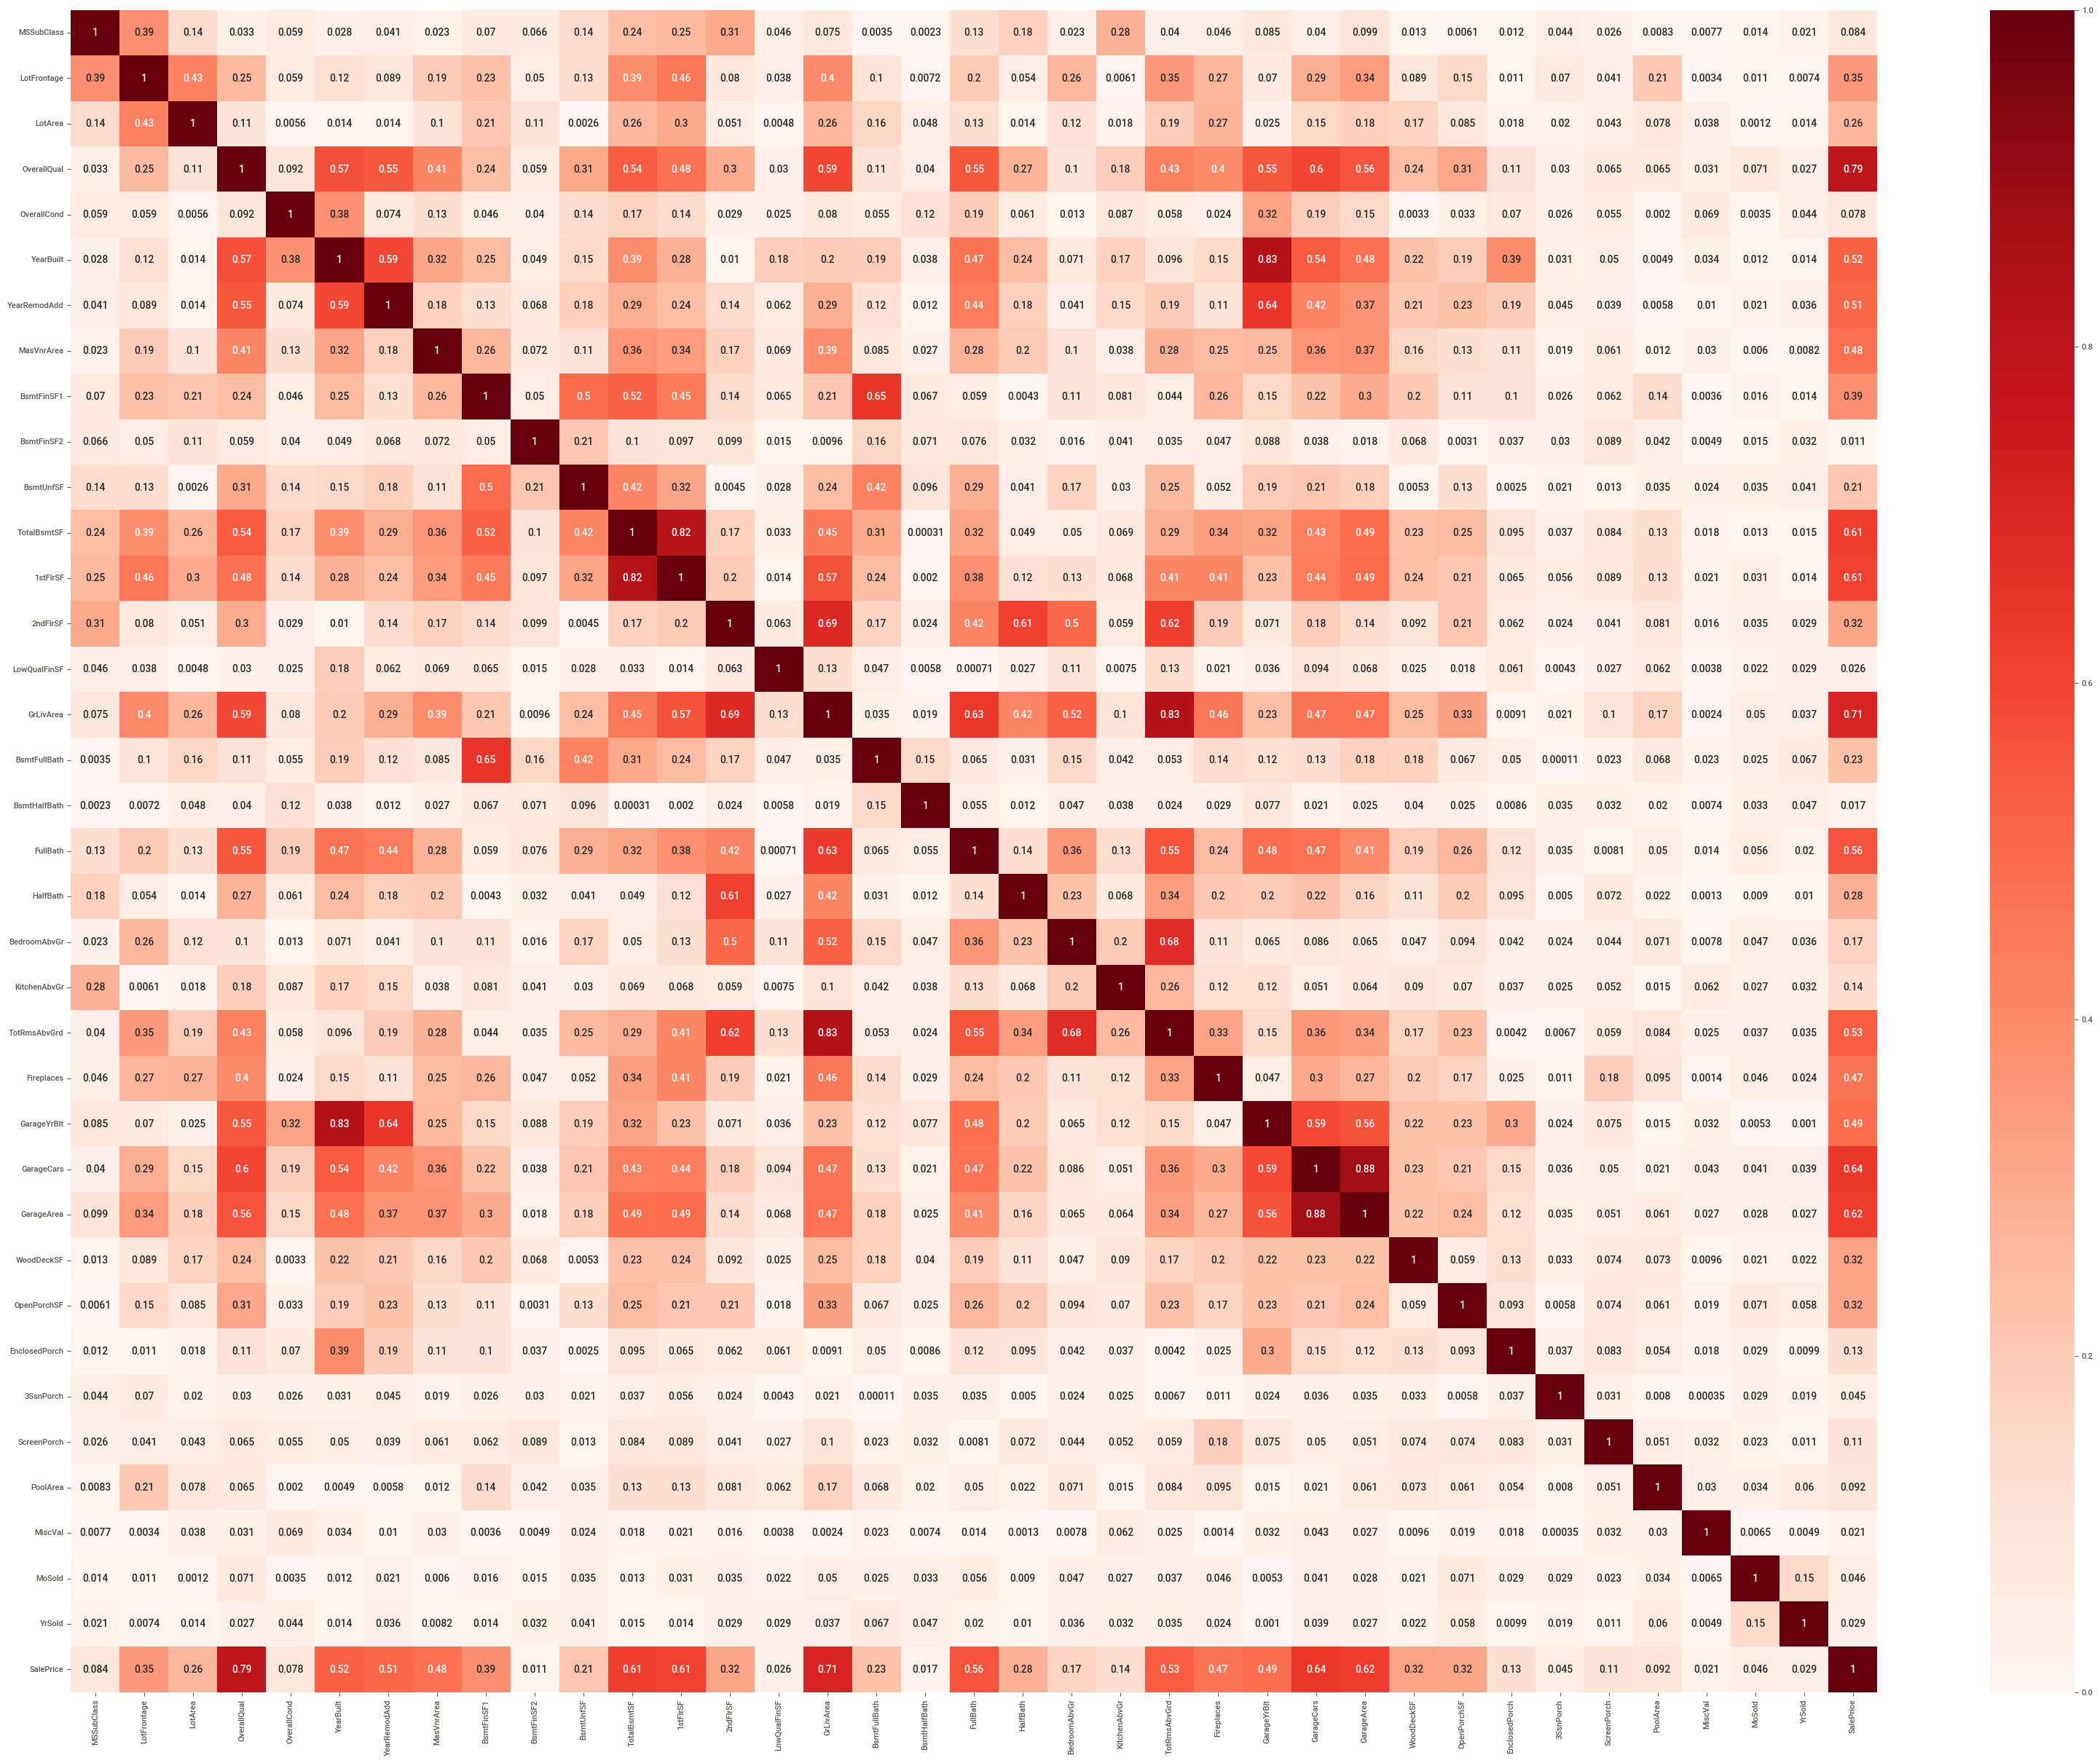

In [7]:
plt.figure(figsize=(40,30))
cor = np.abs(train_data.corr())
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, vmin=0, vmax=1)
plt.show()

**conclution:**
from the map i can explore the relevant correletion.
in addition i can saw the missing value, the the types of the features


# **Data Pre-processing**

**Addressing Missing Value**

In [8]:
null_features = train_data.columns[train_data.isnull().any()].tolist()
numerical_cols = train_data[null_features].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_data[null_features].select_dtypes(include=['object', 'bool']).columns

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)

Numerical Cols: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Categorical Cols: Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


In [9]:
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)
    
    
def missingValue(df, numerical_cols, categorical_cols): 
    for i in numerical_cols:
        df[i].fillna(df[i].median(), inplace=True)
    for i in categorical_cols:
        fill_na_random_pick_column_distribution(df,i)
        
    return df 
        
def removeOutliers(df,numerical_cols):
    use = numerical_cols
    for i in use:
        median = df[i].median()
        df.loc[df[i] > (median * 1.5), i] = median # Replace outliers with the median 
    return df 


train_data = removeOutliers(train_data,numerical_cols)
train_data = missingValue(train_data,numerical_cols, categorical_cols)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

**Find numerical features and ctegorial features**

In [11]:
train_t = train_data['SalePrice'].copy()
train_X = train_data.drop(['SalePrice'], axis=1)

In [12]:
numerical_cols = train_X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_X.select_dtypes(include=['object', 'bool']).columns

print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)

Numerical Cols: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical Cols: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heati

**Encoding** - search for the best one

In [13]:
# prepare OneHotEncoder, DummyEncoder and OrdinalEncoder for latter use

ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

de = OneHotEncoder(drop="first", sparse=False)

encoder = OrdinalEncoder()

**standart scaler**

In [14]:
scaler = StandardScaler()

# Cross-Validation

**Using K-folds method**

Let's create a method that gets: data and model and returns R2 score and MSE loss

In [15]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None,
                          k=None, p=None,
                          show_score_loss_graphs=False, use_pbar=True):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=42)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models',
                    total=find_generator_len(cv.split(X)))

    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', model.score(X_train, t_train),
          mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss,\
     mean_train_score, mean_train_loss

In [16]:
# find generator length
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length',
                    ncols=1000,
                    bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [17]:
numerical_cols = train_X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_X.select_dtypes(include=['object', 'bool']).columns
print('Numerical Cols:', numerical_cols)
print('Categorical Cols:', categorical_cols)

Numerical Cols: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')
Categorical Cols: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heati

In [18]:

ct = ColumnTransformer([
    ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'),
     categorical_cols),
    ("standard", StandardScaler(), numerical_cols)])

print("LinearRegression")
model_pipe = make_pipeline(ct, LinearRegression())
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(train_X, train_t,
                       model_pipe,k=10, show_score_loss_graphs=True)

print("SGDRegressor")
model_pipe = make_pipeline(ct, SGDRegressor(random_state=42))
val_score, val_loss, train_score, train_loss =\
 get_cv_score_and_loss(train_X, train_t,
                       model_pipe,k=10, show_score_loss_graphs=True)

#print(f'mean cv val score: {val_score:.2f}\nmean cv val loss {val_loss:.2f}')
#print(f'mean cv val score: {train_score:.2f}\nmean cv val loss {train_loss:.2f}')


LinearRegression


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

SGDRegressor


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/10 [00:00<?, ?it/s]

**conclution:** the best number of folds is 6 in SGD. in Linear reggression 7 folds.

# **Feature Selection**

I use Backward Feature Selection method RFE

In [19]:
# find best subset of features on this dataset

numerical_cols = train_X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_X.select_dtypes(include=['object', 'bool']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

ct_enc_std = ColumnTransformer([
            ("encoding", OrdinalEncoder(), categorical_cols),
            ("standard", StandardScaler(), numerical_cols)])

X_encoded = pd.DataFrame(ct_enc_std.fit_transform(train_X, train_t), columns=all_cols)


selector = RFECV(SGDRegressor(random_state=42), cv=RepeatedKFold(n_splits=6, n_repeats=10, random_state=42))
#selector = RFECV(LinearRegression(), cv=RepeatedKFold(n_splits=7, n_repeats=10, random_state=42))
selector.fit(X_encoded, train_t)

print("Optimal number of features in SGD: ", selector.n_features_)
selected_features = train_X.columns[selector.support_]
print("Selected features: ", selected_features)

display(X_encoded.loc[:, selector.support_])

fig = go.Figure()
fig.add_trace(go.Scatter(x=[i for i in range(1, len(selector.feature_names_in_) + 1)]
                         , y=selector.cv_results_['mean_test_score']))
fig.update_xaxes(title_text="Number of features selected")
fig.update_yaxes(title_text="Cross validation R2 score")
fig.show()


Optimal number of features in SGD:  32
Selected features:  Index(['MSZoning', 'LotArea', 'LandContour', 'LandSlope', 'Neighborhood',
       'BldgType', 'OverallCond', 'YearRemodAdd', 'RoofMatl', 'MasVnrArea',
       'ExterQual', 'Foundation', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF2',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'MiscVal'],
      dtype='object')


Street  LandContour  LandSlope  Condition2  BldgType  RoofMatl  \
0        1.0          3.0        0.0         2.0       0.0       1.0   
1        1.0          3.0        0.0         2.0       0.0       1.0   
2        1.0          3.0        0.0         2.0       0.0       1.0   
3        1.0          3.0        0.0         2.0       0.0       1.0   
4        1.0          3.0        0.0         2.0       0.0       1.0   
...      ...          ...        ...         ...       ...       ...   
1455     1.0          3.0        0.0         2.0       0.0       1.0   
1456     1.0          3.0        0.0         2.0       0.0       1.0   
1457     1.0          3.0        0.0         2.0       0.0       1.0   
1458     1.0          3.0        0.0         2.0       0.0       1.0   
1459     1.0          3.0        0.0         2.0       0.0       1.0   

      MasVnrType  ExterCond  BsmtQual  BsmtFinType2  ...  1stFlrSF  2ndFlrSF  \
0            1.0        4.0       2.0           5.0  ... -0.793434  1.161852   
1            2.0        4.0       2.0           5.0  ...  0.257140 -0.795163   
2            1.0        4.0       2.0           5.0  ... -0.627826  1.189351   
3            2.0        4.0       3.0           5.0  ... -0.521734  0.937276   
4            1.0        4.0       2.0           5.0  ... -0.045611  1.617877   
...          ...        ...       ...           ...  ...       ...       ...   
1455         2.0        4.0       2.0           5.0  ... -0.542435  0.795198   
1456         3.0        4.0       2.0           4.0  ...  2.355701 -0.795163   
1457         2.0        2.0       3.0           5.0  ...  0.065656  1.844744   
1458         2.0        4.0       3.0           4.0  ... -0.218982 -0.795163   
1459         2.0        4.0       3.0           3.0  ...  0.241615 -0.795163   

      GrLivArea  BsmtFullBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0      0.370333      1.107810      0.163779     -0.211454      0.912210   
1     -0.482512     -0.819964      0.163779     -0.211454     -0.318683   
2      0.515013      1.107810      0.163779     -0.211454     -0.318683   
3      0.383659      1.107810      0.163779     -0.211454      0.296763   
4      1.299326      1.107810      1.390023     -0.211454      1.527656   
...         ...           ...           ...           ...           ...   
1455   0.250402     -0.819964      0.163779     -0.211454      0.296763   
1456   1.061367      1.107810      0.163779     -0.211454      0.296763   
1457   1.569647     -0.819964      1.390023     -0.211454      1.527656   
1458  -0.832788      1.107810     -1.062465     -0.211454     -0.934130   
1459  -0.493934      1.107810      0.163779     -0.211454     -0.318683   

      Fireplaces  GarageCars  ScreenPorch  
0      -0.951226    0.311725    -0.270208  
1       0.600495    0.311725    -0.270208  
2       0.600495    0.311725    -0.270208  
3       0.600495    1.650307    -0.270208  
4       0.600495    1.650307    -0.270208  
...          ...         ...          ...  
1455    0.600495    0.311725    -0.270208  
1456    2.152216    0.311725    -0.270208  
1457    2.152216   -1.026858    -0.270208  
1458   -0.951226   -1.026858    -0.270208  
1459   -0.951226   -1.026858    -0.270208  

[1460 rows x 32 columns]

**conclution:** the best number of featurs is 29  in 6 KFold

**prepering the data by encoding and scale** - after we found out the best features

In [20]:
train_X_select = train_X[selected_features].copy()

numerical_cols = train_X_select.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_X_select.select_dtypes(include=['object', 'bool']).columns

#encoding - ordinaly and scaler

encoder.fit(train_X_select[categorical_cols]) #ordinary
train_X_select[categorical_cols] = encoder.transform(train_X_select[categorical_cols])

scaler.fit(train_X_select[numerical_cols])
train_X_select[numerical_cols] = scaler.transform(train_X_select[numerical_cols])


train_X_select

MSZoning   LotArea  LandContour  LandSlope  Neighborhood  BldgType  \
0          3.0 -0.207142          3.0        0.0           5.0       0.0   
1          3.0 -0.091886          3.0        0.0          24.0       0.0   
2          3.0  0.073480          3.0        0.0           5.0       0.0   
3          3.0 -0.096897          3.0        0.0           6.0       0.0   
4          3.0  0.375148          3.0        0.0          15.0       0.0   
...        ...       ...          ...        ...           ...       ...   
1455       3.0 -0.260560          3.0        0.0           8.0       0.0   
1456       3.0  0.266407          3.0        0.0          14.0       0.0   
1457       3.0 -0.147810          3.0        0.0           6.0       0.0   
1458       3.0 -0.080160          3.0        0.0          12.0       0.0   
1459       3.0 -0.058112          3.0        0.0           7.0       0.0   

      OverallCond  YearRemodAdd  RoofMatl  MasVnrArea  ...  KitchenQual  \
0       -0.517200      0.878668       1.0         0.0  ...          2.0   
1        2.179628     -0.429577       1.0         0.0  ...          3.0   
2       -0.517200      0.830215       1.0         0.0  ...          2.0   
3       -0.517200     -0.720298       1.0         0.0  ...          2.0   
4       -0.517200      0.733308       1.0         0.0  ...          2.0   
...           ...           ...       ...         ...  ...          ...   
1455    -0.517200      0.733308       1.0         0.0  ...          3.0   
1456     0.381743      0.151865       1.0         0.0  ...          3.0   
1457     3.078570      1.024029       1.0         0.0  ...          2.0   
1458     0.381743      0.539493       1.0         0.0  ...          2.0   
1459     0.381743     -0.962566       1.0         0.0  ...          3.0   

      TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0         0.912210   -0.951226          3.0    0.311725    0.351000   
1        -0.318683    0.600495          4.0    0.311725   -0.060731   
2        -0.318683    0.600495          4.0    0.311725    0.631726   
3         0.296763    0.600495          2.0    1.650307    0.790804   
4         1.527656    0.600495          4.0    1.650307    1.698485   
...            ...         ...          ...         ...         ...   
1455      0.296763    0.600495          4.0    0.311725   -0.060731   
1456      0.296763    2.152216          4.0    0.311725    0.126420   
1457      1.527656    2.152216          2.0   -1.026858   -1.033914   
1458     -0.934130   -0.951226          2.0   -1.026858   -1.090059   
1459     -0.318683   -0.951226          2.0   -1.026858   -0.921624   

      GarageQual  GarageCond  WoodDeckSF   MiscVal  
0            4.0         4.0   -0.752176 -0.087688  
1            4.0         4.0    1.626195 -0.087688  
2            4.0         4.0   -0.752176 -0.087688  
3            4.0         4.0   -0.752176 -0.087688  
4            4.0         4.0    0.780197 -0.087688  
...          ...         ...         ...       ...  
1455         4.0         4.0   -0.752176 -0.087688  
1456         4.0         4.0    2.033231 -0.087688  
1457         4.0         4.0   -0.752176  4.953112  
1458         4.0         4.0    2.168910 -0.087688  
1459         4.0         4.0    5.121921 -0.087688  

[1460 rows x 32 columns]

# **Regularization**

In [21]:
sgd_lasso_reg = SGDRegressor(penalty='l1',random_state=42)
sgd_ridge_reg = SGDRegressor(penalty='l2',random_state=42)
sgd_elastic_reg = SGDRegressor(penalty='elasticnet', random_state=42)

print("R2 score for regression:")
print('sgd_lasso',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_lasso_reg), 
              train_X_select, train_t, cv=6).mean())

print('sgd_ridge',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_ridge_reg), 
              train_X_select, train_t, cv=6).mean())

print('sgd_elastic',
      cross_val_score(
          make_pipeline(
              StandardScaler(), 
              sgd_elastic_reg), 
              train_X_select, train_t, cv=6).mean())

R2 score for regression:
sgd_lasso 0.7633182148905343
sgd_ridge 0.7633279210398847
sgd_elastic 0.7633264657654736


# **Hyper-Parameters Search**

In [22]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

#X_normalized = StandardScaler().fit_transform(X)
hyper_parameters = {'penalty': ('l2', 'l1','elasticnet'),
                    'alpha':[0.00001,0.0001, 0.001, 0.01, 0.1,0.2,0.5,0.7],
                    'epsilon': [0.0001, 0.001, 0.01, 0.1,0.5],
                    'eta0': [0.001,0.005,0.01,0.02,0.05]}

gs_model = GridSearchCV(
    SGDRegressor(random_state=42, max_iter = 3000), hyper_parameters, cv = 6).fit(train_X_select, train_t)

print('Accuracy score for regression:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for regression:
gs_model 0.7322518739128098
best params {'alpha': 0.1, 'epsilon': 0.0001, 'eta0': 0.001, 'penalty': 'l2'}


In [23]:
hyper_parameters = {
                    'fit_intercept':[True,False],
                    'copy_X': [True,False],
                    'n_jobs': [1,3,5,7]}

l_model = GridSearchCV(
    LinearRegression(), hyper_parameters, cv = 7).fit(train_X_select, train_t)

print('Accuracy score for regression:')
print('linear_model', l_model.best_score_)
print('best params', l_model.best_params_)

Accuracy score for regression:
linear_model 0.765387788861432
best params {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1}


**method that show on graph the loss and score of specific hyper parameter**

In [24]:
def get_hyperParameters_score_and_loss(X, t, hyperParamName, hyperParamArray, val = False):
    scores_losses_df = pd.DataFrame(columns=[hyperParamName, 'split', 'score', 'loss'])
    
    X_train,X_test,y_train,y_test = train_test_split(X,t,test_size=0.2,random_state=1)

    
    for i in hyperParamArray:
        if hyperParamName == 'alpha':
            SGDmodel =  SGDRegressor(random_state=42, alpha = i)
        if hyperParamName == 'penalty':
            SGDmodel =  SGDRegressor(random_state=42, penalty = i)
        if hyperParamName == 'epsilon':
            SGDmodel =  SGDRegressor(random_state=42, epsilon = i)
        if hyperParamName == 'eta0':
            SGDmodel =  SGDRegressor(random_state=42, eta0 = i)
        SGDmodel.fit(X_train, y_train)

        X_pred = SGDmodel.predict(X_train)
        t_pred = SGDmodel.predict(X_test)
        
        scores_losses_df.loc[len(scores_losses_df)] =\
         [i, 'train', SGDmodel.score(X_train, y_train), mean_squared_error(y_train, X_pred)]
        if val == True:
            scores_losses_df.loc[len(scores_losses_df)] =\
             [i, 'val', SGDmodel.score(X_test, y_test), mean_squared_error(y_test, t_pred)]
        
        
    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']
    
    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()
        
    fig = px.line(scores_losses_df, x=hyperParamName, y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
    fig.show()
    fig = px.line(scores_losses_df, x=hyperParamName, y='score', color='split', title=f'mean val score: {mean_val_score:.2f}, Mean Train score: {mean_train_score:.2f}')
    fig.show()

    return None

In [25]:
get_hyperParameters_score_and_loss(train_X_select,train_t,'alpha',[0.00001,0.0001, 0.001, 0.01, 0.1,0.2,0.5,0.7], val = True)

In [26]:
get_hyperParameters_score_and_loss(train_X_select,train_t,'penalty',['l2', 'l1','elasticnet'],val = False)

In [27]:
get_hyperParameters_score_and_loss(train_X_select,train_t,'eta0', [0.001,0.005,0.01,0.02,0.05],val = True)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



# **Test set Prediction**

In [28]:
model_SGD = SGDRegressor(random_state=42, alpha = gs_model.best_params_['alpha'], 
                         epsilon = gs_model.best_params_['epsilon'],
                         eta0 = gs_model.best_params_['eta0'],
                         penalty = gs_model.best_params_['penalty'])

model_SGD.fit(train_X_select,train_t)
model_SGD.score(train_X_select,train_t)

0.7583560018979368

In [29]:

l_model.score(train_X_select,train_t)

0.8015697089929985

**Prepering the test data**

In [30]:
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

#save for creating submission dataframe
test_ids = test_data['Id'] 

#drop feature with a lot off nulls
test_data = test_data.drop(['PoolQC', 'MiscFeature','Alley','Fence','Id'], axis = 1)

# fiil in the missing values
null_features = test_data.columns[test_data.isnull().any()].tolist()
numerical_cols = test_data[null_features].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = test_data[null_features].select_dtypes(include=['object', 'bool']).columns
test_data = missingValue(test_data,numerical_cols, categorical_cols)
train_data = removeOutliers(test_data,numerical_cols)

#select only importent features
test_data = test_data[selected_features].copy()

#encoding
numerical_cols = test_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = test_data.select_dtypes(include=['object', 'bool']).columns
encoder.fit(test_data[categorical_cols]) #ordinary
test_data[categorical_cols] = encoder.transform(test_data[categorical_cols])

scaler.fit(test_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

test_data

MSZoning   LotArea  LandContour  LandSlope  Neighborhood  BldgType  \
0          2.0  0.363929          3.0        0.0          12.0       0.0   
1          3.0  0.897861          3.0        0.0          12.0       0.0   
2          3.0  0.809646          3.0        0.0           8.0       0.0   
3          3.0  0.032064          3.0        0.0           8.0       0.0   
4          3.0 -0.971808          1.0        0.0          22.0       4.0   
...        ...       ...          ...        ...           ...       ...   
1454       4.0 -1.591330          3.0        0.0          10.0       3.0   
1455       4.0 -1.599808          3.0        0.0          10.0       4.0   
1456       3.0  2.055150          3.0        0.0          11.0       0.0   
1457       3.0  0.125527          3.0        0.0          11.0       0.0   
1458       3.0 -0.038790          3.0        1.0          11.0       0.0   

      OverallCond  YearRemodAdd  RoofMatl  MasVnrArea  ...  KitchenQual  \
0        0.400766     -1.072885       0.0         0.0  ...          3.0   
1        0.400766     -1.214908       0.0         0.0  ...          2.0   
2       -0.497418      0.678742       0.0         0.0  ...          3.0   
3        0.400766      0.678742       0.0         0.0  ...          2.0   
4       -0.497418      0.394694       0.0         0.0  ...          2.0   
...           ...           ...       ...         ...  ...          ...   
1454     1.298950     -0.646813       0.0         0.0  ...          3.0   
1455    -0.497418     -0.646813       0.0         0.0  ...          3.0   
1456     1.298950      0.584059       0.0         0.0  ...          3.0   
1457    -0.497418      0.394694       0.0         0.0  ...          3.0   
1458    -0.497418      0.489377       0.0         0.0  ...          3.0   

      TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageCars  GarageArea  \
0        -0.918335   -0.898055          2.0   -1.004072    0.344645   
1        -0.255371   -0.898055          2.0   -1.004072   -0.731148   
2        -0.255371    0.647066          4.0    0.336222    0.357452   
3         0.407593    0.647066          2.0    0.336222    0.280610   
4        -0.918335   -0.898055          2.0    0.336222    0.511137   
...            ...         ...          ...         ...         ...   
1454     -0.918335   -0.898055          4.0   -2.344365   -2.729051   
1455     -0.255371   -0.898055          4.0   -1.004072   -0.897640   
1456      0.407593    0.647066          4.0    0.336222    0.959385   
1457     -0.255371   -0.898055          2.0   -2.344365   -2.729051   
1458      1.733522    0.647066          4.0    1.676515    1.433246   

      GarageQual  GarageCond  WoodDeckSF    MiscVal  
0            3.0         4.0    0.366678  -0.092244  
1            3.0         4.0    2.347867  19.730438  
2            3.0         4.0    0.930495  -0.092244  
3            3.0         4.0    2.089451  -0.092244  
4            3.0         4.0   -0.729632  -0.092244  
...          ...         ...         ...        ...  
1454         3.0         4.0   -0.729632  -0.092244  
1455         3.0         4.0   -0.729632  -0.092244  
1456         3.0         4.0    2.982161  -0.092244  
1457         3.0         4.0   -0.103169   1.017827  
1458         3.0         4.0    0.758218  -0.092244  

[1459 rows x 32 columns]

**Predicting the SalePrice for the given Test data**

In [31]:
preds_sgd = model_SGD.predict(test_data)

In [32]:
preds_l = l_model.predict(test_data)

**Storing these Predictions in a data frame and exporting it**

In [33]:
sub_df = pd.DataFrame({'Id':test_ids,'SalePrice':preds_sgd})
sub_df = sub_df.astype({'Id': 'int32'})
sub_df.to_csv('submission.csv',index=False)
sub_df

Id      SalePrice
0     1461   78704.781719
1     1462  132992.711937
2     1463  176064.103403
3     1464  192574.895175
4     1465  158896.481907
...    ...            ...
1454  2915   64065.780254
1455  2916   78521.610540
1456  2917  189872.445954
1457  2918   93971.396145
1458  2919  241483.248550

[1459 rows x 2 columns]

# **Conclusion**

It is a complex task that requires  to predict house prices using linear regression, regularization, and feature selection. I SGD regression model provides  approach to estimating house prices. When dealing with a large number of features, however, it may suffer from overfitting (high variance) so i use feature selection to reduce the number of the features.Also, Ridge regularization method can effectively address these issues by introducing a penalty term that reduces the coefficients of less important features. in addintion i use grid search to search the best hyperparameter to improve the model. This can make house price predictions more accurate.

# **References**

Afeka Moodle 

Dataset instructions - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

SKlearn - https://scikit-learn.org/stable/

Notebooks examples - https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code
